# DESIGN THE FILTERS TO IDENTIFY THE CH MUTATIONS

### MAIN STEPS

1. Study 5 CH frequent mutation sites

2. Analyze criteria to extract CH mutations

3. Extract CH mutations

4. Select severe consequence

5. Exclude mutations present in gnomAD

6. Filter lower VAF or higher VAF


Analysis implemented in Python script: **ukb_identifiy_ch_variants.py**


In [9]:
import pandas as pd
import os
from io import StringIO
import gzip
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 20)

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [29]:
# List MAF fiels
maf_files = os.listdir('/workspace/projects/clonalhemato_ukb/ch_variants_50k_mafvep')
maf_files = [file for file in maf_files if '.maf.vep2.gz' in file]
print(len(maf_files))

# Open 1st MAF
filename = '/workspace/projects/clonalhemato_ukb/ch_variants_50k_mafvep/' + maf_files[0]
print(filename)
maf = pd.read_csv(filename, sep= '\t')
maf

49989
/workspace/projects/clonalhemato_ukb/ch_variants_50k_mafvep/4033478_23161_0_0_ch.maf.vep2.gz


,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP
0,1,1806456,rs77354509,G,A,514.77,14,27,0.518519,0.481481,1,SNV,intron_variant,MODIFIER,GNB1,ENST00000378609,NaN,NaN,NaN,rs77354509,ENSP00000367872,0.071070,0.104300,0/1,"13,14,0",99,0|1,1806456_G_A,"543,0,1150,588,1192,1780","12,1,14,0",BaseQRankSum=-3.829;DB;DP=28;ExcessHet=3.0103;...,CSQ=A|intron_variant|MODIFIER|GNB1|ENSG0000007...,.,CSQ=A|intron_variant|MODIFIER|GNB1|ENSG0000007...
1,1,1806461,rs17363334,C,T,546.77,15,30,0.500000,0.500000,1,SNV,intron_variant,MODIFIER,GNB1,ENST00000378609,NaN,NaN,NaN,rs17363334,ENSP00000367872,0.071840,0.104300,0/1,"15,15,0",99,0|1,1806456_G_A,"575,0,1147,620,1192,1812","12,3,14,1",BaseQRankSum=-4.741;DB;DP=31;ExcessHet=3.0103;...,CSQ=T|intron_variant|MODIFIER|GNB1|ENSG0000007...,.,CSQ=T|intron_variant|MODIFIER|GNB1|ENSG0000007...
2,1,43339569,rs16830693,A,G,881.77,27,41,0.658537,0.341463,1,SNV,splice_region_variant&synonymous_variant,LOW,MPL,ENST00000372470,690,230,E,rs16830693,ENSP00000361548,0.034390,0.030360,0/1,"14,27,0",99,NaN,NaN,"910,0,459,952,541,1493","5,9,6,21",BaseQRankSum=1.575;DB;DP=41;ExcessHet=3.0103;M...,CSQ=G|splice_region_variant&synonymous_variant...,.,CSQ=G|splice_region_variant&synonymous_variant...
3,1,43346404,rs1760670,G,A,232.77,8,19,0.421053,0.578947,1,SNV,intron_variant,MODIFIER,MPL,ENST00000372470,NaN,NaN,NaN,rs1760670,ENSP00000361548,0.303400,0.379200,0/1,"11,8,0",99,NaN,NaN,"261,0,437,294,461,755","11,0,8,0",BaseQRankSum=-3.638;DB;DP=19;ExcessHet=3.0103;...,CSQ=A|intron_variant|MODIFIER|MPL|ENSG00000117...,.,CSQ=A|intron_variant|MODIFIER|MPL|ENSG00000117...
4,1,43349193,rs839995,T,C,190.77,6,17,0.352941,0.647059,1,SNV,intron_variant,MODIFIER,MPL,ENST00000372470,NaN,NaN,NaN,rs839995,ENSP00000361548,NaN,NaN,0/1,"11,6,0",99,NaN,NaN,"219,0,341,252,360,611","9,2,5,1",BaseQRankSum=3.403;DB;DP=17;ExcessHet=3.0103;M...,CSQ=C|intron_variant|MODIFIER|MPL|ENSG00000117...,.,CSQ=C|intron_variant|MODIFIER|MPL|ENSG00000117...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,X,124066457,rs760494042,GT,G,358.73,10,18,0.555556,0.444444,1,Indel,intron_variant,MODIFIER,STAG2,ENST00000371145,NaN,NaN,NaN,rs34494691,ENSP00000360187,0.001552,0.002352,0/1,"8,10,0",99,0|1,124066457_GT_G,"396,0,501,420,531,951","2,6,0,10",BaseQRankSum=-0.324;DB;DP=20;ExcessHet=3.0103;...,-|intron_variant|MODIFIER|STAG2|ENSG0000010197...,.,CSQ=-|intron_variant|MODIFIER|STAG2|ENSG000001...
360,X,124066463,rs34397445,AT,A,358.73,10,18,0.555556,0.444444,1,Indel,intron_variant,MODIFIER,STAG2,ENST00000371145,NaN,NaN,NaN,rs34397445,ENSP00000360187,0.001950,0.002941,0/1,"8,10,0",99,0|1,124066457_GT_G,"396,0,501,420,531,951","2,6,0,10",BaseQRankSum=0.318;DB;DP=18;ExcessHet=3.0103;M...,-|intron_variant|MODIFIER|STAG2|ENSG0000010197...,.,CSQ=-|intron_variant|MODIFIER|STAG2|ENSG000001...
361,X,124068468,rs113697794,C,CTATA,76.73,3,7,0.428571,0.571429,1,Indel,intron_variant,MODIFIER,STAG2,ENST00000371145,NaN,NaN,NaN,rs35736501,ENSP00000360187,NaN,NaN,0/1,"4,3,0",99,NaN,NaN,"114,0,237,126,246,372","4,0,3,0",BaseQRankSum=-1.204;DB;DP=7;ExcessHet=3.0103;M...,TATA|intron_variant|MODIFIER|STAG2|ENSG0000010...,.,CSQ=TATA|intron_variant|MODIFIER|STAG2|ENSG000...
362,2,197400449,rs770725816,T,A,308.73,16,31,0.516129,0.483871,2,SNV,intron_variant,MODIFIER,SF3B1,ENST00000335508,NaN,NaN,NaN,rs788017&COSV59207593,ENSP00000335321,0.653800,0.673800,0/1,"15,16,0,0",99,NaN,NaN,"346,0,578,434,448,997,433,554,961,1013","3,12,1,15",BaseQRankSum=-0.262;DB;DP=39;ExcessHet=3.0103;...,CSQ=A|intron_variant|MODIFIER|SF3B1|ENSG000001...,.,CSQ=A|intron_variant|MODIFIER|SF3B1|ENSG000001...


In [43]:
#3638042

filename = '/workspace/projects/clonalhemato_ukb/ch_variants_50k_mafvep/1976701_23161_0_0_ch.maf.vep2.gz'
print(filename)
maftest = pd.read_csv(filename, sep= '\t')
maftest['Prot_pos'] = maftest['Prot_pos'].apply(lambda x: str(x).split('.')[0])
maftest[(maftest['SYMBOL'] == 'DNMT3A') & (maftest['Prot_pos'] == '882')]

/workspace/projects/clonalhemato_ukb/ch_variants_50k_mafvep/1976701_23161_0_0_ch.maf.vep2.gz


,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP
18,2,25234374,rs377577594,G,A,9.31,6,70,0.085714,0.914286,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2644,882,R/C,rs377577594&COSV53036332&COSV53037241&COSV5306...,ENSP00000264709,0.000123,0.000123,0/1,"64,6,0",37,NaN,NaN,"37,0,2293,229,2311,2541","25,39,1,5",BaseQRankSum=-0.212;DB;DP=70;ExcessHet=3.0103;...,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...


# 1. Study 5 CH frequent mutation sites

In [49]:
### GET VAF FROM MOST FREQUENT CH MUTATIONS

## Create empty dataframes with the same columns
DNMT3A_882 = maf[maf['SYMBOL']== 'xxxxxx']
JAK2_617 = maf[maf['SYMBOL']== 'xxxxxx']
DNMT3A_635 = maf[maf['SYMBOL']== 'xxxxxx']
DNMT3A_736 = maf[maf['SYMBOL']== 'xxxxxx']
PPM1D_552 = maf[maf['SYMBOL']== 'xxxxxx']


## Loop through the 50K MAFs
for file in tqdm(maf_files):
    filename = '/workspace/projects/clonalhemato_ukb/ch_variants_50k_mafvep/' + file
    maf = pd.read_csv(filename, sep= '\t')
    
    # Eliminate "." in "Protein position" values
    maf['Prot_pos'] = maf['Prot_pos'].apply(lambda x: str(x).split('.')[0])
    
    # Get variants in specific gene_position
    maf_DNMT3A_882 = maf[(maf['SYMBOL'] == 'DNMT3A') & (maf['Prot_pos'] == '882')]
    maf_JAK2_617 = maf[(maf['SYMBOL'] == 'JAK2') & (maf['Prot_pos'] == '617')]
    maf_DNMT3A_635 = maf[(maf['SYMBOL'] == 'DNMT3A') & (maf['Prot_pos'] == '635')]
    maf_DNMT3A_736 = maf[(maf['SYMBOL'] == 'DNMT3A') & (maf['Prot_pos'] == '736')]
    maf_PPM1D_552 = maf[(maf['SYMBOL'] == 'PPM1D') & (maf['Prot_pos'] == '552')]
    
    # Concatenate dataframes
    if len(maf_DNMT3A_882) > 0:
        DNMT3A_882 = pd.concat([DNMT3A_882, maf_DNMT3A_882])
    if len(maf_JAK2_617) > 0:
        JAK2_617 = pd.concat([JAK2_617, maf_JAK2_617])
    if len(maf_DNMT3A_635) > 0:
        DNMT3A_635 = pd.concat([DNMT3A_635, maf_DNMT3A_635])
    if len(maf_DNMT3A_736) > 0:
        DNMT3A_736 = pd.concat([DNMT3A_736, maf_DNMT3A_736])
    if len(maf_PPM1D_552) > 0:
        PPM1D_552 = pd.concat([PPM1D_552, maf_PPM1D_552])



100%|██████████| 49989/49989 [19:56<00:00, 41.77it/s]


In [51]:
## Save results in new files

# DNMT3A_882.to_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/CHmutations_DNMT3A_882.txt',
#                   sep="\t", index = False)
# JAK2_617.to_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/CHmutations_JAK2_617.txt',
#                   sep="\t", index = False)
# DNMT3A_635.to_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/CHmutations_DNMT3A_635.txt',
#                   sep="\t", index = False)
# DNMT3A_736.to_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/CHmutations_DNMT3A_736.txt',
#                   sep="\t", index = False)
# PPM1D_552.to_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/CHmutations_PPM1D_552.txt',
#                   sep="\t", index = False)


In [55]:
DNMT3A_882 = pd.read_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/CHmutations_DNMT3A_882.txt',
                  sep="\t")
DNMT3A_882

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP
0,2,25234373,rs147001633,C,T,283.77,18,98,0.183673,0.816327,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2645.0,882,R/H,rs147001633&COSV53036153&COSV53040144&COSV5304...,ENSP00000264709,0.000219,0.000159,0/1,"80,18,0",99,NaN,NaN,"312,0,2445,552,2499,3052","27,53,10,8",BaseQRankSum=0.690;DB;DP=98;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...
1,2,25234373,rs147001633,C,T,638.77,25,65,0.384615,0.615385,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2645.0,882,R/H,rs147001633&COSV53036153&COSV53040144&COSV5304...,ENSP00000264709,0.000219,0.000159,0/1,"40,25,0",99,NaN,NaN,"667,0,1133,787,1208,1995","18,22,9,16",BaseQRankSum=1.103;DB;DP=65;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...
2,2,25234373,rs147001633,C,T,7.60,6,54,0.111111,0.888889,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2645.0,882,R/H,rs147001633&COSV53036153&COSV53040144&COSV5304...,ENSP00000264709,0.000219,0.000159,0/1,"48,6,0",35,NaN,NaN,"35,0,1494,178,1512,1691","21,27,1,5",BaseQRankSum=-0.598;DB;DP=54;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...
3,2,25234374,rs377577594,G,A,162.77,9,50,0.180000,0.820000,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2644.0,882,R/C,rs377577594&COSV53036332&COSV53037241&COSV5306...,ENSP00000264709,0.000123,0.000123,0/1,"41,9,0",99,NaN,NaN,"191,0,1359,314,1386,1700","16,25,7,2",BaseQRankSum=0.343;DB;DP=50;ExcessHet=3.0103;M...,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...
4,2,25234373,rs147001633,C,T,163.77,9,52,0.173077,0.826923,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2645.0,882,R/H,rs147001633&COSV53036153&COSV53040144&COSV5304...,ENSP00000264709,0.000219,0.000159,0/1,"43,9,0",99,NaN,NaN,"192,0,1428,322,1455,1777","18,25,4,5",BaseQRankSum=1.219;DB;DP=52;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2,25234373,rs147001633,C,T,671.77,23,65,0.353846,0.646154,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2645.0,882,R/H,rs147001633&COSV53036153&COSV53040144&COSV5304...,ENSP00000264709,0.000219,0.000159,0/1,"42,23,0",99,NaN,NaN,"700,0,1328,827,1398,2224","20,22,4,19",BaseQRankSum=1.068;DB;DP=65;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...
100,2,25234373,rs147001633,C,T,78.77,7,43,0.162791,0.837209,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2645.0,882,R/H,rs147001633&COSV53036153&COSV53040144&COSV5304...,ENSP00000264709,0.000219,0.000159,0/1,"36,7,0",99,NaN,NaN,"107,0,1148,215,1169,1384","11,25,3,4",BaseQRankSum=1.022;DB;DP=43;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...
101,2,25234373,rs147001633,C,T,0.00,6,63,0.095238,0.904762,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2645.0,882,R/H,rs147001633&COSV53036153&COSV53040144&COSV5304...,ENSP00000264709,0.000219,0.000159,0/0,"57,6,0",13,NaN,NaN,"0,13,1860,171,1878,2036","27,30,2,4",BaseQRankSum=-1.811;DB;DP=63;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...
102,2,25234374,rs377577594,G,A,9.31,6,62,0.096774,0.903226,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2644.0,882,R/C,rs377577594&COSV53036332&COSV53037241&COSV5306...,ENSP00000264709,0.000123,0.000123,0/1,

104


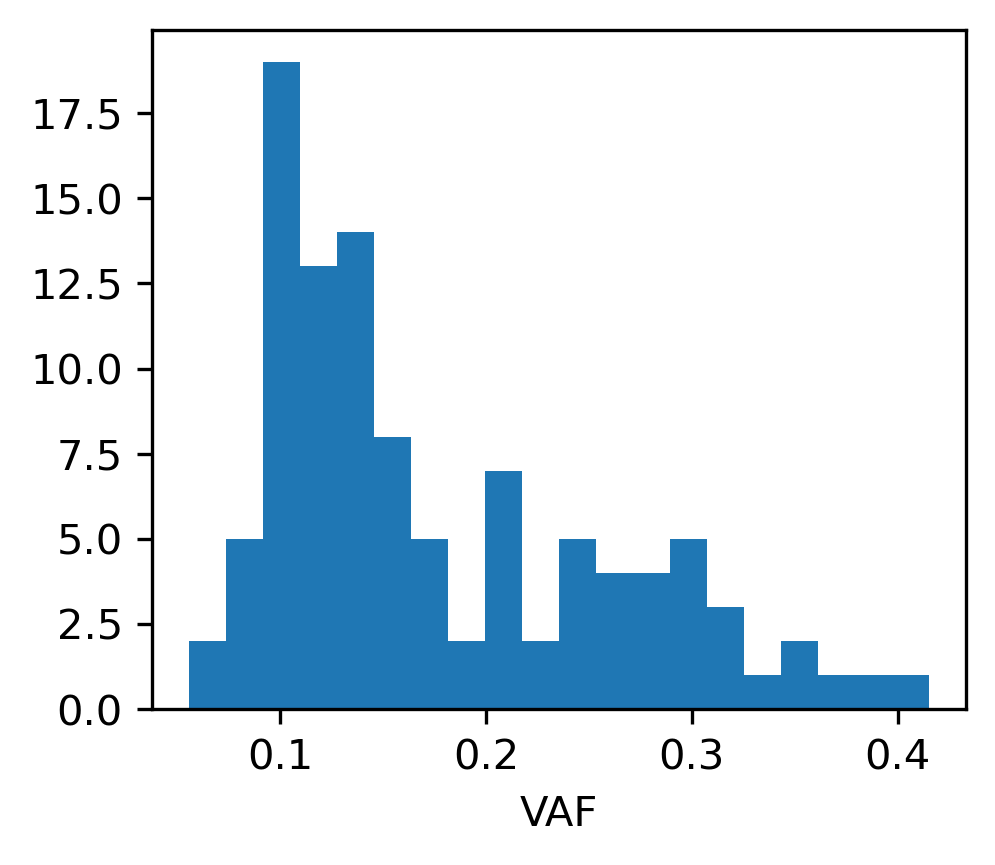

In [56]:
print(len(DNMT3A_882))

plt.hist(DNMT3A_882['VAF_alt'],20)
plt.xlabel('VAF')
plt.show()

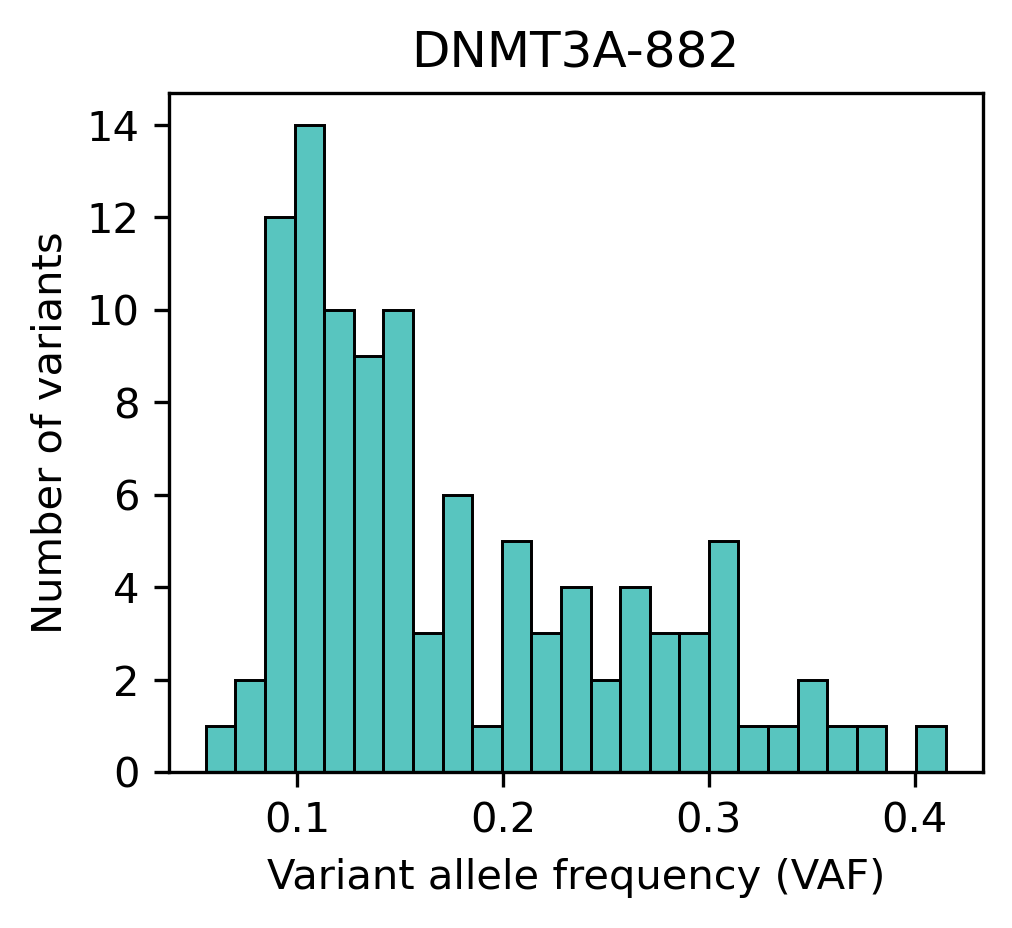

In [92]:
plt.rcParams["figure.figsize"] = (3.5,3)
graph = sns.histplot(DNMT3A_882['VAF_alt'], bins=25, color="lightseagreen")
graph.set(xlabel="Variant allele frequency (VAF)", ylabel="Number of variants", title="DNMT3A-882")
#plt.axvline(x=0.3333, color='black',linestyle='--', linewidth=0.5)
#plt.axvline(x=0.3, color='black',linestyle='--', linewidth=0.5)
plt.show()

50


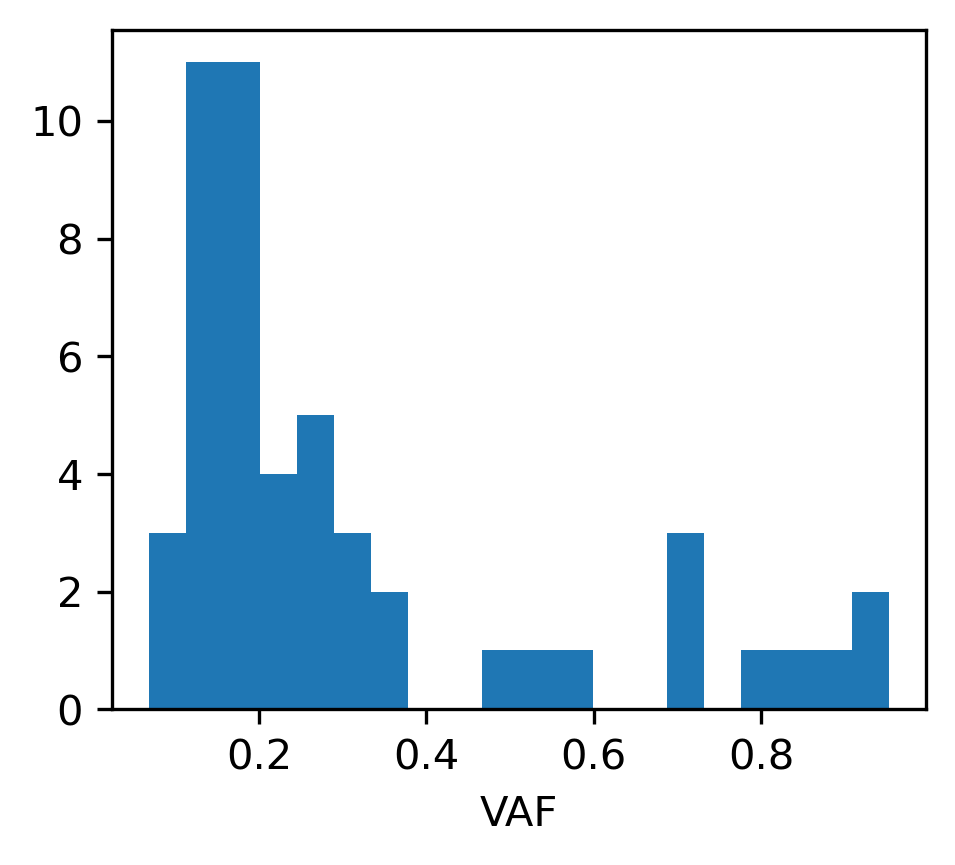

In [57]:
JAK2_617 = pd.read_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/CHmutations_JAK2_617.txt',
                  sep="\t")

print(len(JAK2_617))

plt.hist(JAK2_617['VAF_alt'], 20)
plt.xlabel('VAF')
plt.show()

14


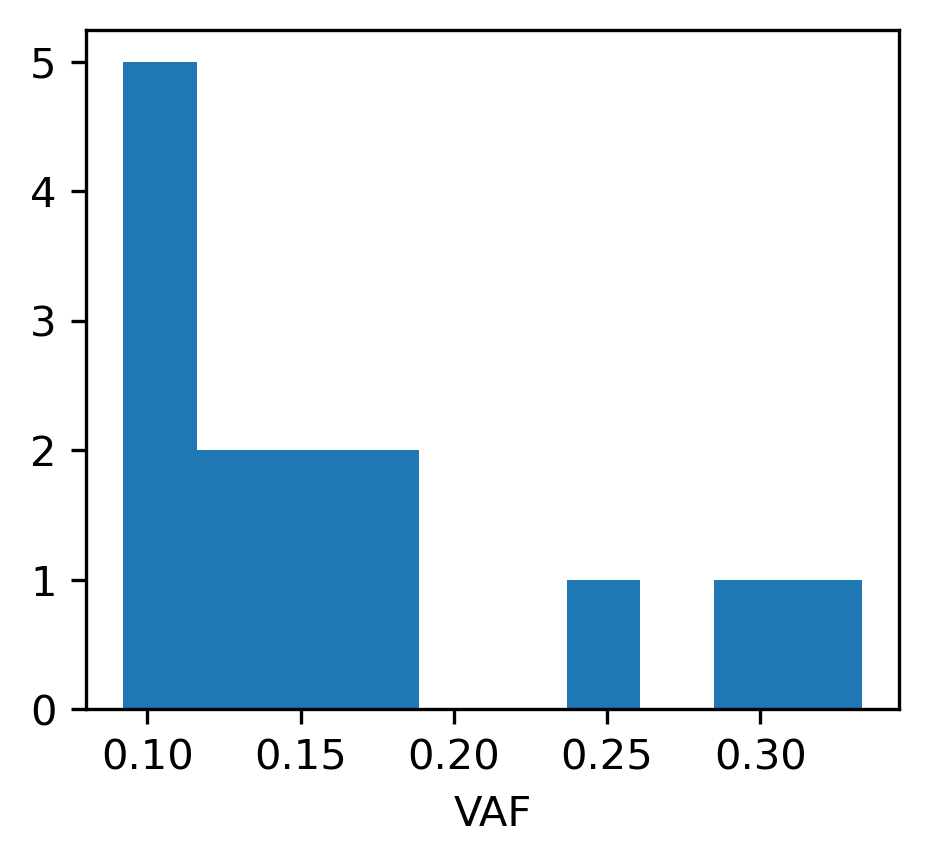

In [58]:
DNMT3A_635 = pd.read_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/CHmutations_DNMT3A_635.txt',
                  sep="\t")

print(len(DNMT3A_635))

plt.hist(DNMT3A_635['VAF_alt'])
plt.xlabel('VAF')
plt.show()

17


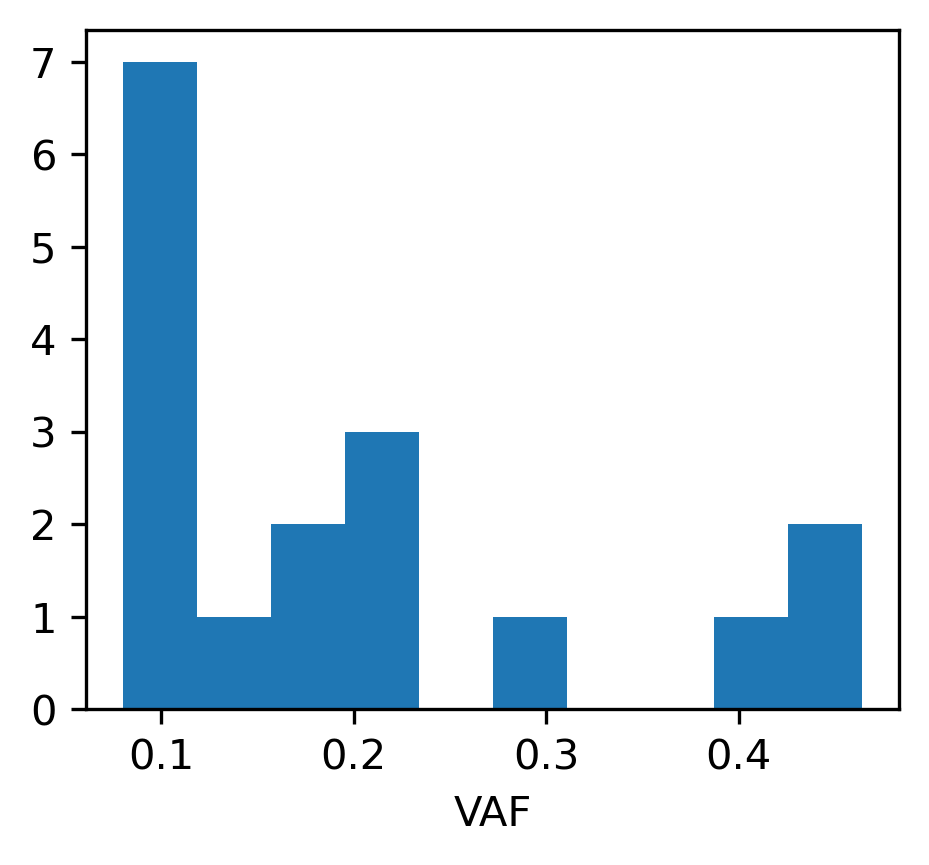

In [59]:
DNMT3A_736 = pd.read_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/CHmutations_DNMT3A_736.txt',
                  sep="\t")

print(len(DNMT3A_736))

plt.hist(DNMT3A_736['VAF_alt'])
plt.xlabel('VAF')
plt.show()

4


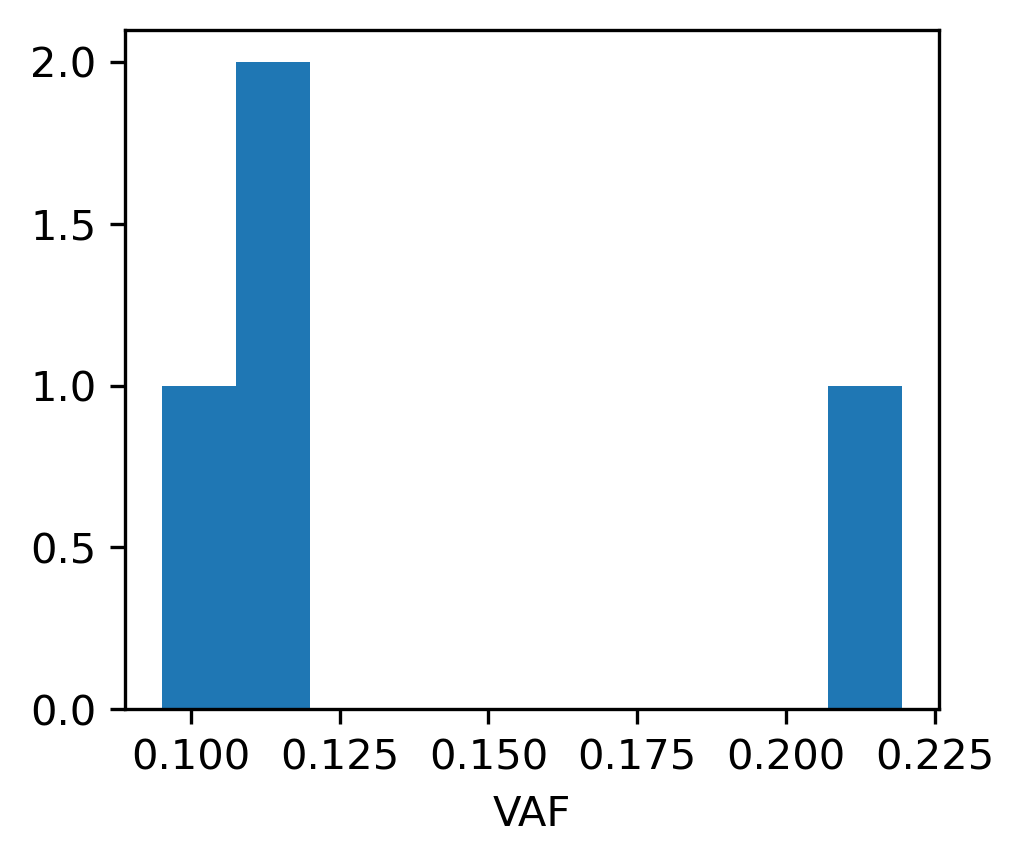

In [60]:
PPM1D_552 = pd.read_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/CHmutations_PPM1D_552.txt',
                  sep="\t")

print(len(PPM1D_552))

plt.hist(PPM1D_552['VAF_alt'])
plt.xlabel('VAF')
plt.show()

189


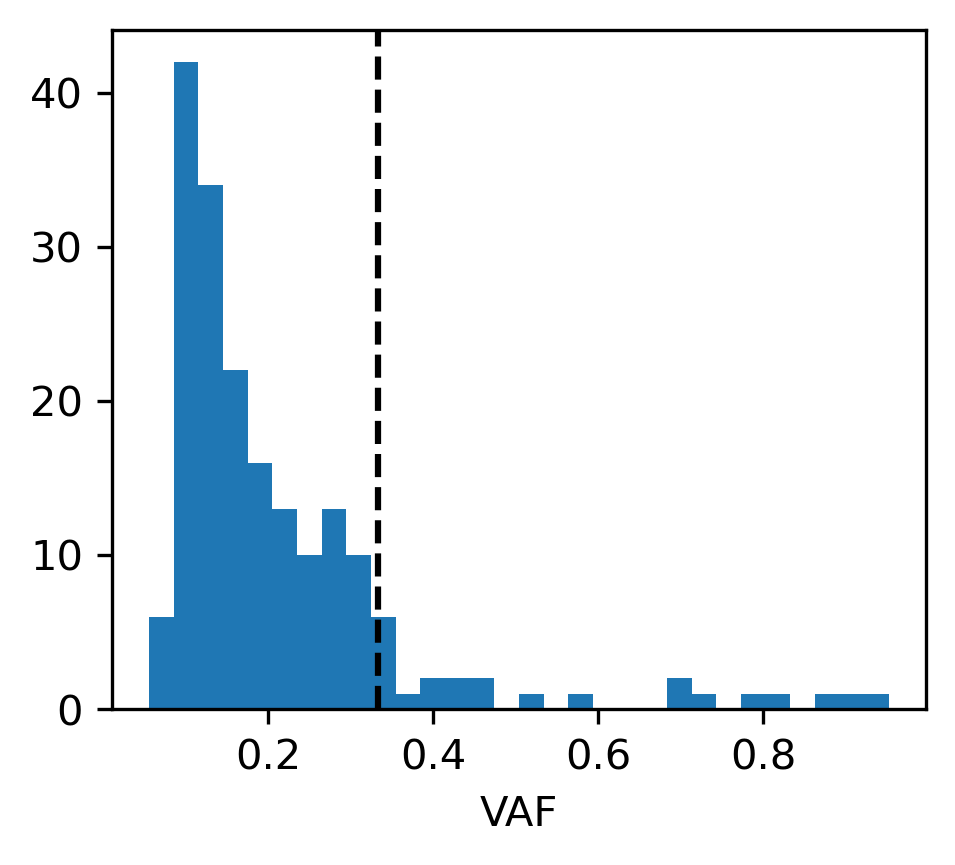

In [66]:
### Analayze VAF from the 5 mutations together

# Join all VAFs
all_VAF = list(DNMT3A_882['VAF_alt'])
all_VAF = all_VAF + list(JAK2_617['VAF_alt'])
all_VAF = all_VAF + list(DNMT3A_635['VAF_alt'])
all_VAF = all_VAF + list(DNMT3A_736['VAF_alt'])
all_VAF = all_VAF + list(PPM1D_552['VAF_alt'])
print(len(all_VAF))

# Histogram
plt.hist(all_VAF, 30)
plt.xlabel('VAF')
plt.axvline(x=0.3333, color='black',linestyle='--')
# plt.axvline(x=0.3, color='black',linestyle='--')
# plt.axvline(x=0.25, color='black',linestyle='--')
# plt.axvline(x=0.2, color='black',linestyle='--')
plt.show()

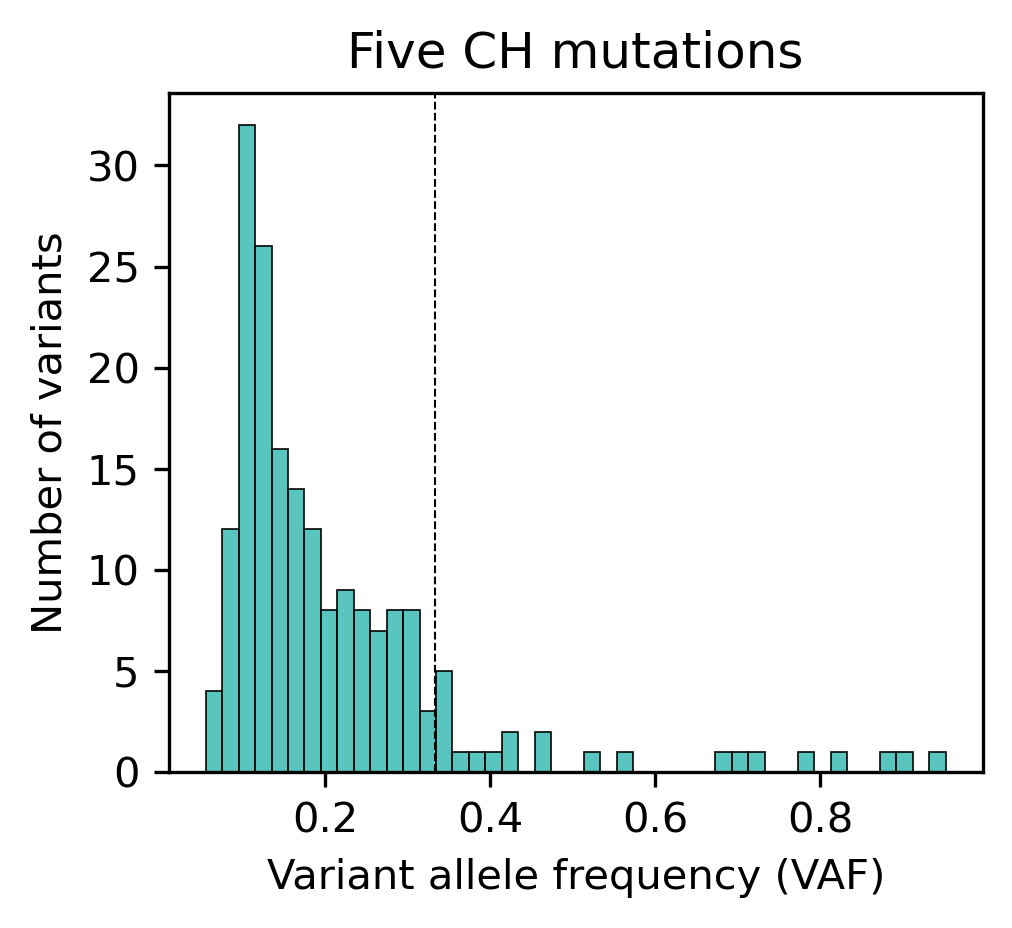

In [85]:
plt.rcParams["figure.figsize"] = (3.5,3)
graph = sns.histplot(all_VAF, bins=45, color="lightseagreen")
graph.set(xlabel="Variant allele frequency (VAF)", ylabel="Number of variants", title="Five CH mutations")
plt.axvline(x=0.3333, color='black',linestyle='--', linewidth=0.5)
#plt.axvline(x=0.3, color='black',linestyle='--', linewidth=0.5)
plt.show()

In [73]:
# Summary
round(pd.DataFrame(all_VAF).describe(percentiles=[.1,.25, .5, .75,.9]), 3)

,0
count,189.000
mean,0.213
std,0.158
min,0.056
10%,0.098
25%,0.113
50%,0.162
75%,0.256
90%,0.348
max,0.952


In [93]:
### Analyse threshold

print("All mutations:")
print(len(all_VAF))
print()

print("Mutations VAF <= 33%:")
print(len([i for i in all_VAF if i <= 0.3333]))
print(round(len([i for i in all_VAF if i <= 0.3333]) / len(all_VAF),3))
print()

print("Mutations VAF <= 30%:")
print(len([i for i in all_VAF if i <= 0.30]))
print(round(len([i for i in all_VAF if i <= 0.30]) / len(all_VAF),3))
print()

print("Mutations VAF <= 25%:")
print(len([i for i in all_VAF if i <= 0.25]))
print(round(len([i for i in all_VAF if i <= 0.25]) / len(all_VAF),3))
print()

print("Mutations VAF <= 20%:")
print(len([i for i in all_VAF if i <= 0.20]))
print(round(len([i for i in all_VAF if i <= 0.20]) / len(all_VAF),3))
print()

All mutations:
189

Mutations VAF <= 33%:
166
0.878

Mutations VAF <= 30%:
157
0.831

Mutations VAF <= 25%:
141
0.746

Mutations VAF <= 20%:
118
0.624



# 2. Analyze criteria to extract CH mutations


**CRITERIA**

1. Minumum 2 AD


2. VAF <= 30%


- Consequence of mutation??? Remove intronic?


- Minimum DP?? (if VAF <= 0.3 and AD >= 2, DP >= 7)


- Minimum VAF? 2%? (less that 0.1% of mutations have VAF < 2%)

In [13]:
# Open 1st MAF
filename = '/workspace/projects/clonalhemato_ukb/ch_variants_50k_mafvep/' + maf_files[0]
maf = pd.read_csv(filename, sep= '\t')
maf

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP
0,1,1806456,rs77354509,G,A,514.77,14,27,0.518519,0.481481,1,SNV,intron_variant,MODIFIER,GNB1,ENST00000378609,NaN,NaN,NaN,rs77354509,ENSP00000367872,0.071070,0.104300,0/1,"13,14,0",99,0|1,1806456_G_A,"543,0,1150,588,1192,1780","12,1,14,0",BaseQRankSum=-3.829;DB;DP=28;ExcessHet=3.0103;...,CSQ=A|intron_variant|MODIFIER|GNB1|ENSG0000007...,.,CSQ=A|intron_variant|MODIFIER|GNB1|ENSG0000007...
1,1,1806461,rs17363334,C,T,546.77,15,30,0.500000,0.500000,1,SNV,intron_variant,MODIFIER,GNB1,ENST00000378609,NaN,NaN,NaN,rs17363334,ENSP00000367872,0.071840,0.104300,0/1,"15,15,0",99,0|1,1806456_G_A,"575,0,1147,620,1192,1812","12,3,14,1",BaseQRankSum=-4.741;DB;DP=31;ExcessHet=3.0103;...,CSQ=T|intron_variant|MODIFIER|GNB1|ENSG0000007...,.,CSQ=T|intron_variant|MODIFIER|GNB1|ENSG0000007...
2,1,43339569,rs16830693,A,G,881.77,27,41,0.658537,0.341463,1,SNV,splice_region_variant&synonymous_variant,LOW,MPL,ENST00000372470,690,230,E,rs16830693,ENSP00000361548,0.034390,0.030360,0/1,"14,27,0",99,NaN,NaN,"910,0,459,952,541,1493","5,9,6,21",BaseQRankSum=1.575;DB;DP=41;ExcessHet=3.0103;M...,CSQ=G|splice_region_variant&synonymous_variant...,.,CSQ=G|splice_region_variant&synonymous_variant...
3,1,43346404,rs1760670,G,A,232.77,8,19,0.421053,0.578947,1,SNV,intron_variant,MODIFIER,MPL,ENST00000372470,NaN,NaN,NaN,rs1760670,ENSP00000361548,0.303400,0.379200,0/1,"11,8,0",99,NaN,NaN,"261,0,437,294,461,755","11,0,8,0",BaseQRankSum=-3.638;DB;DP=19;ExcessHet=3.0103;...,CSQ=A|intron_variant|MODIFIER|MPL|ENSG00000117...,.,CSQ=A|intron_variant|MODIFIER|MPL|ENSG00000117...
4,1,43349193,rs839995,T,C,190.77,6,17,0.352941,0.647059,1,SNV,intron_variant,MODIFIER,MPL,ENST00000372470,NaN,NaN,NaN,rs839995,ENSP00000361548,NaN,NaN,0/1,"11,6,0",99,NaN,NaN,"219,0,341,252,360,611","9,2,5,1",BaseQRankSum=3.403;DB;DP=17;ExcessHet=3.0103;M...,CSQ=C|intron_variant|MODIFIER|MPL|ENSG00000117...,.,CSQ=C|intron_variant|MODIFIER|MPL|ENSG00000117...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,X,124066457,rs760494042,GT,G,358.73,10,18,0.555556,0.444444,1,Indel,intron_variant,MODIFIER,STAG2,ENST00000371145,NaN,NaN,NaN,rs34494691,ENSP00000360187,0.001552,0.002352,0/1,"8,10,0",99,0|1,124066457_GT_G,"396,0,501,420,531,951","2,6,0,10",BaseQRankSum=-0.324;DB;DP=20;ExcessHet=3.0103;...,-|intron_variant|MODIFIER|STAG2|ENSG0000010197...,.,CSQ=-|intron_variant|MODIFIER|STAG2|ENSG000001...
360,X,124066463,rs34397445,AT,A,358.73,10,18,0.555556,0.444444,1,Indel,intron_variant,MODIFIER,STAG2,ENST00000371145,NaN,NaN,NaN,rs34397445,ENSP00000360187,0.001950,0.002941,0/1,"8,10,0",99,0|1,124066457_GT_G,"396,0,501,420,531,951","2,6,0,10",BaseQRankSum=0.318;DB;DP=18;ExcessHet=3.0103;M...,-|intron_variant|MODIFIER|STAG2|ENSG0000010197...,.,CSQ=-|intron_variant|MODIFIER|STAG2|ENSG000001...
361,X,124068468,rs113697794,C,CTATA,76.73,3,7,0.428571,0.571429,1,Indel,intron_variant,MODIFIER,STAG2,ENST00000371145,NaN,NaN,NaN,rs35736501,ENSP00000360187,NaN,NaN,0/1,"4,3,0",99,NaN,NaN,"114,0,237,126,246,372","4,0,3,0",BaseQRankSum=-1.204;DB;DP=7;ExcessHet=3.0103;M...,TATA|intron_variant|MODIFIER|STAG2|ENSG0000010...,.,CSQ=TATA|intron_variant|MODIFIER|STAG2|ENSG000...
362,2,197400449,rs770725816,T,A,308.73,16,31,0.516129,0.483871,2,SNV,intron_variant,MODIFIER,SF3B1,ENST00000335508,NaN,NaN,NaN,rs788017&COSV59207593,ENSP00000335321,0.653800,0.673800,0/1,"15,16,0,0",99,NaN,NaN,"346,0,578,434,448,997,433,554,961,1013","3,12,1,15",BaseQRankSum=-0.262;DB;DP=39;ExcessHet=3.0103;...,CSQ=A|intron_variant|MODIFIER|SF3B1|ENSG000001...,.,CSQ=A|intron_variant|MODIFIER|SF3B1|ENSG000001...


In [14]:
# Check number of variants that fulfill conditions
print(len(maf))
# Minumum 2 AD
print(len(maf[maf['AD_alt'] >= 2]))
# Less than 30% VAF
print(len(maf[maf['VAF_alt'] <= 0.3]))
print(len(maf[(maf['AD_alt'] >= 2) & (maf['VAF_alt'] <= 0.3)]))

364
358
60
54


In [15]:
# Apply filters
maf_CH = maf[(maf['AD_alt'] >= 2) & (maf['VAF_alt'] <= 0.3)]
maf_CH

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP
5,1,179117284,rs779694937,TA,T,0.04,2,13,0.153846,0.846154,1,Indel,intron_variant,MODIFIER,ABL2,ENST00000502732,NaN,NaN,NaN,rs56346584,ENSP00000427562,0.017660,0.006356,0/1,"11,2,0",17,NaN,NaN,"17,0,267,50,273,323","11,0,2,0",BaseQRankSum=-0.619;DB;DP=14;ExcessHet=3.0103;...,-|intron_variant|MODIFIER|ABL2|ENSG00000143322...,.,CSQ=-|intron_variant|MODIFIER|ABL2|ENSG0000014...
8,1,204532210,.,A,G,0.00,2,17,0.117647,0.882353,1,SNV,missense_variant,MODERATE,MDM4,ENST00000367182,307,103,R/G,NaN,ENSP00000356150,NaN,NaN,0/0,"15,2,0",2,NaN,NaN,"0,2,477,45,483,526","11,4,1,1",BaseQRankSum=-1.345;DP=17;ExcessHet=3.0103;MLE...,G|missense_variant|MODERATE|MDM4|ENSG000001986...,.,CSQ=G|missense_variant|MODERATE|MDM4|ENSG00000...
23,2,100106464,.,T,C,0.00,2,36,0.055556,0.944444,1,SNV,upstream_gene_variant,MODIFIER,AFF3,ENST00000409579,NaN,NaN,NaN,NaN,ENSP00000386834,NaN,NaN,0/0,"34,2,0",62,1|0,100106446_A_G,"0,62,1357,105,1363,1406","10,24,1,1",BaseQRankSum=-2.244;DP=37;ExcessHet=3.0103;MLE...,C|upstream_gene_variant|MODIFIER|AFF3|ENSG0000...,.,CSQ=C|intron_variant|MODIFIER|AFF3|ENSG0000014...
31,2,208245451,rs761775775,GA,G,2.42,2,7,0.285714,0.714286,1,Indel,intron_variant,MODIFIER,IDH1,ENST00000415913,NaN,NaN,NaN,rs569424950,ENSP00000390265,0.002208,0.002518,0/1,"5,2,0",36,NaN,NaN,"36,0,122,51,128,179","0,5,0,2",BaseQRankSum=-0.712;DB;DP=11;ExcessHet=3.0103;...,-|intron_variant|MODIFIER|IDH1|ENSG00000138413...,.,CSQ=-|intron_variant|MODIFIER|IDH1|ENSG0000013...
34,3,71197805,.,G,T,19.81,2,11,0.181818,0.818182,1,SNV,intron_variant,MODIFIER,FOXP1,ENST00000615603,NaN,NaN,NaN,NaN,ENSP00000484803,NaN,NaN,0/1,"9,2,0",48,NaN,NaN,"48,0,345,75,351,426","9,0,2,0",BaseQRankSum=-1.691;DP=11;ExcessHet=3.0103;MLE...,T|intron_variant|MODIFIER|FOXP1|ENSG0000011486...,.,CSQ=T|downstream_gene_variant|MODIFIER|FOXP1|E...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,22,40417060,rs775297504,GA,G,0.00,3,30,0.100000,0.900000,1,Indel,intron_variant,MODIFIER,MRTFA,ENST00000652095,NaN,NaN,NaN,rs367823907,ENSP00000498671,0.211400,0.212000,0/0,"27,3,0",5,NaN,NaN,"0,5,605,80,614,689","4,23,1,2",BaseQRankSum=-0.595;DB;DP=36;ExcessHet=3.0103;...,-|intron_variant|MODIFIER|MRTFA|ENSG0000019658...,.,CSQ=-|intron_variant|MODIFIER|MRTFA|ENSG000001...
342,X,44974596,rs6611055,C,A,94.77,4,15,0.266667,0.733333,1,SNV,intron_variant,MODIFIER,KDM6A,ENST00000377967,NaN,NaN,NaN,rs6611055,ENSP00000367203,NaN,NaN,0/1,"11,4,0",99,NaN,NaN,"123,0,440,156,452,608","11,0,4,0",BaseQRankSum=-1.697;DB;DP=15;ExcessHet=3.0103;...,CSQ=A|intron_variant|MODIFIER|KDM6A|ENSG000001...,.,CSQ=A|intron_variant|MODIFIER|KDM6A|ENSG000001...
349,X,67695823,rs12837784,A,T,0.32,4,35,0.114286,0.885714,1,SNV,intron_variant,MODIFIER,AR,ENST00000374690,NaN,NaN,NaN,rs12837784,ENSP00000363822,NaN,NaN,0/1,"31,4,0",17,NaN,NaN,"17,0,1002,110,1014,1124","15,16,1,3",BaseQRankSum=-0.709;DB;DP=37;ExcessHet=3.0103;...,CSQ=T|intron_variant|MODIFIER|AR|ENSG000001690...,.,CSQ=T|intron_variant|MODIFIER|AR|ENSG000001690...
353,X,124051119,.,A,G,0.10,2,15,0.133333,0.866667,1,SNV,splice_acceptor_variant,HIGH,STAG2,ENST00000371145,NaN,NaN,NaN,COSV54370330&COSV54371550,ENSP00000360187,NaN,NaN,0/1,"13,2,0",12,NaN,NaN,"12,0,481,51,488,539","11,2,1,1",BaseQRankSum=-1.831;DP=16;ExcessHet=3.0103;MLE...,G|splice_acceptor_variant|HIGH|STAG2|ENSG00000...,.,CSQ=G|splice_acceptor_variant|HIGH|STAG2|ENSG0...


In [16]:
# AD alternative allel
round(maf_CH['AD_alt'].describe(), 1)

count    54.0
mean      5.5
std      10.8
min       2.0
25%       2.0
50%       3.0
75%       5.0
max      80.0
Name: AD_alt, dtype: float64

In [17]:
# Depth
round(maf_CH['DP'].describe(), 1)

count     54.0
mean      30.8
std       38.8
min        7.0
25%       13.5
50%       20.0
75%       34.0
max      269.0
Name: DP, dtype: float64

In [18]:
maf_CH['ALT_num'].value_counts()

1    54
Name: ALT_num, dtype: int64

In [19]:
maf_CH['var_type'].value_counts()

SNV      30
Indel    24
Name: var_type, dtype: int64

In [20]:
maf_CH['Consequence'].value_counts()

intron_variant                                     33
synonymous_variant                                  5
missense_variant                                    5
splice_region_variant&intron_variant                3
splice_acceptor_variant                             2
3_prime_UTR_variant                                 2
missense_variant&splice_region_variant              1
upstream_gene_variant                               1
stop_gained&frameshift_variant                      1
splice_acceptor_variant&coding_sequence_variant     1
Name: Consequence, dtype: int64

In [21]:
maf_CH['SYMBOL'].value_counts()

KMT2C     14
ATE1       3
SUZ12      3
ATM        3
NF1        3
          ..
EZH2       1
NOTCH1     1
RAD21      1
CHEK2      1
ABL2       1
Name: SYMBOL, Length: 28, dtype: int64

In [22]:
### Select variants inside protein sequence

maf_CH_protein = maf_CH[maf_CH['Prot_pos'].notnull()]
maf_CH_protein

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP
8,1,204532210,.,A,G,0.00,2,17,0.117647,0.882353,1,SNV,missense_variant,MODERATE,MDM4,ENST00000367182,307,103,R/G,NaN,ENSP00000356150,NaN,NaN,0/0,"15,2,0",2,NaN,NaN,"0,2,477,45,483,526","11,4,1,1",BaseQRankSum=-1.345;DP=17;ExcessHet=3.0103;MLE...,G|missense_variant|MODERATE|MDM4|ENSG000001986...,.,CSQ=G|missense_variant|MODERATE|MDM4|ENSG00000...
107,7,152235860,rs199504848,C,T,0.13,6,62,0.096774,0.903226,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.013970,0.018870,0/1,"56,6,0",13,NaN,NaN,"13,0,1714,181,1732,1913","34,22,4,2",BaseQRankSum=0.288;DB;DP=62;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...
108,7,152235880,rs78472109,C,T,118.77,13,71,0.183099,0.816901,1,SNV,synonymous_variant,LOW,KMT2C,ENST00000262189,2706,902,S,rs78472109,ENSP00000262189,0.136000,0.182400,0/1,"58,13,0",99,NaN,NaN,"147,0,1732,322,1771,2093","32,26,7,6",BaseQRankSum=-0.979;DB;DP=72;ExcessHet=3.0103;...,CSQ=T|synonymous_variant|LOW|KMT2C|ENSG0000005...,.,CSQ=T|synonymous_variant|LOW|KMT2C|ENSG0000005...
109,7,152238746,rs62478303,G,A,0.01,3,35,0.085714,0.914286,1,SNV,synonymous_variant,LOW,KMT2C,ENST00000262189,2613,871,P,rs62478303,ENSP00000262189,0.001616,0.001721,0/1,"32,3,0",3,NaN,NaN,"3,0,1032,99,1041,1140","10,22,0,3",BaseQRankSum=-1.173;DB;DP=35;ExcessHet=3.0103;...,CSQ=A|synonymous_variant|LOW|KMT2C|ENSG0000005...,.,CSQ=A|synonymous_variant|LOW|KMT2C|ENSG0000005...
110,7,152238768,rs4024420,T,C,0.75,4,28,0.142857,0.857143,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2591,864,E/G,rs4024420,ENSP00000262189,0.041240,0.051350,0/1,"24,4,0",21,NaN,NaN,"21,0,703,93,715,808","12,12,0,4",BaseQRankSum=3.245;DB;DP=28;ExcessHet=3.0103;M...,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...
111,7,152238825,rs4024419,C,T,12.99,4,20,0.200000,0.800000,1,SNV,missense_variant&splice_region_variant,MODERATE,KMT2C,ENST00000262189,2534,845,G/E,rs4024419,ENSP00000262189,0.019910,0.028420,0/1,"16,4,0",41,NaN,NaN,"41,0,505,89,517,606","5,11,0,4",BaseQRankSum=0.049;DB;DP=20;ExcessHet=3.0103;M...,CSQ=T|missense_variant&splice_region_variant|M...,.,CSQ=T|missense_variant&splice_region_variant|M...
115,7,152247986,rs150073007,G,GT,166.73,9,44,0.204545,0.795455,1,Indel,stop_gained&frameshift_variant,HIGH,KMT2C,ENST00000262189,2447-2448,816,Y/*,rs150073007,ENSP00000262189,0.487200,0.484900,0/1,"35,9,0",99,NaN,NaN,"204,0,1155,310,1182,1491","26,9,5,4",BaseQRankSum=-0.888;DB;DP=46;ExcessHet=3.0103;...,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,.,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...
116,7,152248016,rs3896406,G,C,182.77,12,55,0.218182,0.781818,1,SNV,synonymous_variant,LOW,KMT2C,ENST00000262189,2418,806,S,rs3896406&COSV51275152,ENSP00000262189,0.247600,0.295700,0/1,"43,12,0",99,NaN,NaN,"211,0,1356,340,1392,1732","25,18,6,6",BaseQRankSum=-0.621;DB;DP=55;ExcessHet=3.0103;...,CSQ=C|synonymous_variant|LOW|KMT2C|ENSG0000005...,.,CSQ=C|synonymous_variant|LOW|KMT2C|ENSG0000005...
117,7,152265091,rs62478356,T,A,1501.77,80,269,0.297398,0.702602,1,SNV,synonymous_variant,LOW,KMT2C,ENST00000262189,1131,377,P,rs62478356,ENSP00000262189,0.405500,0.444700,0/1,"189,80,0",99,NaN,NaN,"1530,0,5041,2097,5281,7378","99,90,42,38",BaseQRankSum=0.923;DB;DP=269;ExcessHet=3.0103;...,CSQ=A|synonymous_variant|LOW|KMT2C|ENSG0000005...,.,CSQ=A|synonymous_variant|LOW|KMT2C|ENSG0000005...
120,7,152273846,rs56850341,G,A,0.00,5,51,0.098039,0.901961,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,871,291,L/F,rs56850341,ENSP00000262189,0.499900,0.499900,0/0,"46,5,0",7,NaN,NaN,"0,7,1499,138,1514,1646","19,27,0,5",BaseQRankSum=-0.958;DB;DP=51;ExcessHet=3.0103;...,CSQ=A|missense_variant|MODERATE|KMT2

In [23]:
maf_CH_protein['Consequence'].value_counts()

synonymous_variant                                 5
missense_variant                                   5
splice_acceptor_variant&coding_sequence_variant    1
missense_variant&splice_region_variant             1
stop_gained&frameshift_variant                     1
Name: Consequence, dtype: int64

In [24]:
### Eliminate intron_variant

maf_CH[maf_CH['Consequence'] != 'intron_variant']

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP
8,1,204532210,.,A,G,0.00,2,17,0.117647,0.882353,1,SNV,missense_variant,MODERATE,MDM4,ENST00000367182,307,103,R/G,NaN,ENSP00000356150,NaN,NaN,0/0,"15,2,0",2,NaN,NaN,"0,2,477,45,483,526","11,4,1,1",BaseQRankSum=-1.345;DP=17;ExcessHet=3.0103;MLE...,G|missense_variant|MODERATE|MDM4|ENSG000001986...,.,CSQ=G|missense_variant|MODERATE|MDM4|ENSG00000...
23,2,100106464,.,T,C,0.00,2,36,0.055556,0.944444,1,SNV,upstream_gene_variant,MODIFIER,AFF3,ENST00000409579,NaN,NaN,NaN,NaN,ENSP00000386834,NaN,NaN,0/0,"34,2,0",62,1|0,100106446_A_G,"0,62,1357,105,1363,1406","10,24,1,1",BaseQRankSum=-2.244;DP=37;ExcessHet=3.0103;MLE...,C|upstream_gene_variant|MODIFIER|AFF3|ENSG0000...,.,CSQ=C|intron_variant|MODIFIER|AFF3|ENSG0000014...
82,7,102250062,.,G,GAA,0.00,3,29,0.103448,0.896552,1,Indel,3_prime_UTR_variant,MODIFIER,CUX1,ENST00000360264,NaN,NaN,NaN,NaN,ENSP00000353401,NaN,NaN,0/0,"26,3,0",5,NaN,NaN,"0,5,827,78,836,909","11,15,2,1",BaseQRankSum=-0.290;DP=44;ExcessHet=3.0103;MLE...,AA|3_prime_UTR_variant|MODIFIER|CUX1|ENSG00000...,.,CSQ=AA|3_prime_UTR_variant|MODIFIER|CUX1|ENSG0...
91,7,102257881,.,G,GA,0.08,5,46,0.108696,0.891304,1,Indel,3_prime_UTR_variant,MODIFIER,CUX1,ENST00000360264,NaN,NaN,NaN,rs1176575458,ENSP00000353401,NaN,NaN,0/1,"41,5,0",20,NaN,NaN,"20,0,944,142,962,1104","25,16,3,2",BaseQRankSum=-1.383;DP=48;ExcessHet=3.0103;MLE...,A|3_prime_UTR_variant|MODIFIER|CUX1|ENSG000002...,.,CSQ=A|3_prime_UTR_variant|MODIFIER|CUX1|ENSG00...
99,7,148846605,.,A,G,0.00,2,38,0.052632,0.947368,1,SNV,splice_region_variant&intron_variant,LOW,EZH2,ENST00000320356,NaN,NaN,NaN,NaN,ENSP00000320147,NaN,NaN,0/0,"36,2,0",68,NaN,NaN,"0,68,1301,111,1307,1350","7,29,1,1",BaseQRankSum=-1.777;DP=38;ExcessHet=3.0103;MLE...,CSQ=G|splice_region_variant&intron_variant|LOW...,.,CSQ=G|splice_region_variant&intron_variant|LOW...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,8,116852713,rs549782818,TA,T,0.16,3,13,0.230769,0.769231,1,Indel,splice_region_variant&intron_variant,LOW,RAD21,ENST00000297338,NaN,NaN,NaN,rs369816312,ENSP00000297338,0.1452,0.1429,0/1,"10,3,0",23,NaN,NaN,"23,0,175,51,184,235","4,6,0,3",BaseQRankSum=1.034;DB;DP=17;ExcessHet=3.0103;M...,CSQ=-|splice_region_variant&intron_variant|LOW...,.,CSQ=-|splice_region_variant&intron_variant|LOW...
190,10,121790176,rs35350755,T,G,276.77,14,50,0.280000,0.720000,1,SNV,synonymous_variant,LOW,ATE1,ENST00000224652,1371,457,P,rs35350755,ENSP00000224652,0.4677,0.4504,0/1,"36,14,0",99,NaN,NaN,"305,0,1047,413,1089,1502","18,18,9,5",BaseQRankSum=-0.505;DB;DP=50;ExcessHet=3.0103;...,CSQ=G|synonymous_variant|LOW|ATE1|ENSG00000107...,.,CSQ=G|synonymous_variant|LOW|ATE1|ENSG00000107...
192,10,121836753,.,A,G,0.00,2,22,0.090909,0.909091,1,SNV,missense_variant,MODERATE,ATE1,ENST00000224652,1222,408,F/L,NaN,ENSP00000224652,NaN,NaN,0/0,"20,2,0",17,NaN,NaN,"0,17,707,60,713,757","11,9,1,1",BaseQRankSum=-1.810;DP=22;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|ATE1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|ATE1|ENSG00000...
353,X,124051119,.,A,G,0.10,2,15,0.133333,0.866667,1,SNV,splice_acceptor_variant,HIGH,STAG2,ENST00000371145,NaN,NaN,NaN,COSV54370330&COSV54371550,ENSP00000360187,NaN,NaN,0/1,"13,2,0",12,NaN,NaN,"12,0,481,51,488,539","11,2,1,1",BaseQRankSum=-1.831;DP=16;ExcessHet=3.0103;MLE...,G|splice_acceptor_variant|HIGH|STAG2|ENSG00000...,.,CSQ=G|splice_acceptor_variant|HIGH|STAG2|ENSG0...


# 3. Extract CH mutations

**CRITERIA:**

1. Minumum 2 AD


2. VAF <= 30%


3. In coding position


OTHER POSSIBILITIES:

- Minimum DP?? (if VAF <= 0.3 and AD >= 2, DP >= 7)


- Minimum VAF? 2%? (less that 0.1% of mutations have VAF < 2%)


- Exclude mutations gnomAD??

In [50]:
### Filter with 3 criteria
maf_CH3 = maf[(maf['AD_alt'] >= 2) & (maf['VAF_alt'] <= 0.3) & (maf['Prot_pos'].notnull())]
print(len(maf_CH3))
maf_CH3

13


,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP
8,1,204532210,.,A,G,0.00,2,17,0.117647,0.882353,1,SNV,missense_variant,MODERATE,MDM4,ENST00000367182,307,103,R/G,NaN,ENSP00000356150,NaN,NaN,0/0,"15,2,0",2,NaN,NaN,"0,2,477,45,483,526","11,4,1,1",BaseQRankSum=-1.345;DP=17;ExcessHet=3.0103;MLE...,G|missense_variant|MODERATE|MDM4|ENSG000001986...,.,CSQ=G|missense_variant|MODERATE|MDM4|ENSG00000...
107,7,152235860,rs199504848,C,T,0.13,6,62,0.096774,0.903226,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.013970,0.018870,0/1,"56,6,0",13,NaN,NaN,"13,0,1714,181,1732,1913","34,22,4,2",BaseQRankSum=0.288;DB;DP=62;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...
108,7,152235880,rs78472109,C,T,118.77,13,71,0.183099,0.816901,1,SNV,synonymous_variant,LOW,KMT2C,ENST00000262189,2706,902,S,rs78472109,ENSP00000262189,0.136000,0.182400,0/1,"58,13,0",99,NaN,NaN,"147,0,1732,322,1771,2093","32,26,7,6",BaseQRankSum=-0.979;DB;DP=72;ExcessHet=3.0103;...,CSQ=T|synonymous_variant|LOW|KMT2C|ENSG0000005...,.,CSQ=T|synonymous_variant|LOW|KMT2C|ENSG0000005...
109,7,152238746,rs62478303,G,A,0.01,3,35,0.085714,0.914286,1,SNV,synonymous_variant,LOW,KMT2C,ENST00000262189,2613,871,P,rs62478303,ENSP00000262189,0.001616,0.001721,0/1,"32,3,0",3,NaN,NaN,"3,0,1032,99,1041,1140","10,22,0,3",BaseQRankSum=-1.173;DB;DP=35;ExcessHet=3.0103;...,CSQ=A|synonymous_variant|LOW|KMT2C|ENSG0000005...,.,CSQ=A|synonymous_variant|LOW|KMT2C|ENSG0000005...
110,7,152238768,rs4024420,T,C,0.75,4,28,0.142857,0.857143,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2591,864,E/G,rs4024420,ENSP00000262189,0.041240,0.051350,0/1,"24,4,0",21,NaN,NaN,"21,0,703,93,715,808","12,12,0,4",BaseQRankSum=3.245;DB;DP=28;ExcessHet=3.0103;M...,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...
111,7,152238825,rs4024419,C,T,12.99,4,20,0.200000,0.800000,1,SNV,missense_variant&splice_region_variant,MODERATE,KMT2C,ENST00000262189,2534,845,G/E,rs4024419,ENSP00000262189,0.019910,0.028420,0/1,"16,4,0",41,NaN,NaN,"41,0,505,89,517,606","5,11,0,4",BaseQRankSum=0.049;DB;DP=20;ExcessHet=3.0103;M...,CSQ=T|missense_variant&splice_region_variant|M...,.,CSQ=T|missense_variant&splice_region_variant|M...
115,7,152247986,rs150073007,G,GT,166.73,9,44,0.204545,0.795455,1,Indel,stop_gained&frameshift_variant,HIGH,KMT2C,ENST00000262189,2447-2448,816,Y/*,rs150073007,ENSP00000262189,0.487200,0.484900,0/1,"35,9,0",99,NaN,NaN,"204,0,1155,310,1182,1491","26,9,5,4",BaseQRankSum=-0.888;DB;DP=46;ExcessHet=3.0103;...,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,.,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...
116,7,152248016,rs3896406,G,C,182.77,12,55,0.218182,0.781818,1,SNV,synonymous_variant,LOW,KMT2C,ENST00000262189,2418,806,S,rs3896406&COSV51275152,ENSP00000262189,0.247600,0.295700,0/1,"43,12,0",99,NaN,NaN,"211,0,1356,340,1392,1732","25,18,6,6",BaseQRankSum=-0.621;DB;DP=55;ExcessHet=3.0103;...,CSQ=C|synonymous_variant|LOW|KMT2C|ENSG0000005...,.,CSQ=C|synonymous_variant|LOW|KMT2C|ENSG0000005...
117,7,152265091,rs62478356,T,A,1501.77,80,269,0.297398,0.702602,1,SNV,synonymous_variant,LOW,KMT2C,ENST00000262189,1131,377,P,rs62478356,ENSP00000262189,0.405500,0.444700,0/1,"189,80,0",99,NaN,NaN,"1530,0,5041,2097,5281,7378","99,90,42,38",BaseQRankSum=0.923;DB;DP=269;ExcessHet=3.0103;...,CSQ=A|synonymous_variant|LOW|KMT2C|ENSG0000005...,.,CSQ=A|synonymous_variant|LOW|KMT2C|ENSG0000005...
120,7,152273846,rs56850341,G,A,0.00,5,51,0.098039,0.901961,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,871,291,L/F,rs56850341,ENSP00000262189,0.499900,0.499900,0/0,"46,5,0",7,NaN,NaN,"0,7,1499,138,1514,1646","19,27,0,5",BaseQRankSum=-0.958;DB;DP=51;ExcessHet=3.0103;...,CSQ=A|missense_variant|MODERATE|KMT2

In [26]:
### EXTRACT CH MUTATIONS FIRST 10K CASES

# import warnings
# warnings.filterwarnings('ignore')

# # Create empty dataframes with the same columns
# CH_mutations = maf[maf['SYMBOL']== 'xxxxxx']
# CH_mutations['patient'] = []

# for file in tqdm(maf_files[:10000]):
#     filename = '/workspace/projects/clonalhemato_ukb/ch_variants_50k_mafvep/' + file
#     maf = pd.read_csv(filename, sep= '\t')
    
#     # Select CH mutations
#     maf_CH = maf[(maf['AD_alt'] >= 2) & (maf['VAF_alt'] <= 0.3) & (maf['Prot_pos'].notnull())]
    
#     # Concatenate CH mutations with patient code
#     if len(maf_CH) > 0:
#         patient_code = file.split('_')[0]
#         maf_CH['patient'] = patient_code
#         CH_mutations = pd.concat([CH_mutations, maf_CH])
        

In [27]:
# CH_mutations.to_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/CHmutations_10k.txt.gz',
#                    sep="\t", index=False, compression='gzip')

In [28]:
first_file = '0'
last_file = '100'

output_file = "CHmutations_" + first_file + "_" + last_file + ".txt.gz"
output_file

'CHmutations_0_100.txt.gz'

In [120]:
### READ

# CH_mutations = pd.read_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/partial_data/CHmutations_10k.txt.gz',
#                                sep= '\t')
# CH_mutations

In [54]:
### READ 2

CH_mutations2 = pd.read_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/partial_data/CHmutations_0_5000.txt.gz',
                               sep= '\t') 
CH_mutations2

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient
0,1,204532210,.,A,G,0.00,2,17,0.117647,0.882353,1,SNV,missense_variant,MODERATE,MDM4,ENST00000367182,307,103,R/G,NaN,ENSP00000356150,NaN,NaN,0/0,"15,2,0",2,NaN,NaN,"0,2,477,45,483,526","11,4,1,1",BaseQRankSum=-1.345;DP=17;ExcessHet=3.0103;MLE...,G|missense_variant|MODERATE|MDM4|ENSG000001986...,.,CSQ=G|missense_variant|MODERATE|MDM4|ENSG00000...,4033478
1,7,152235860,rs199504848,C,T,0.13,6,62,0.096774,0.903226,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.01397,0.01887,0/1,"56,6,0",13,NaN,NaN,"13,0,1714,181,1732,1913","34,22,4,2",BaseQRankSum=0.288;DB;DP=62;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478
2,7,152238768,rs4024420,T,C,0.75,4,28,0.142857,0.857143,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2591,864,E/G,rs4024420,ENSP00000262189,0.04124,0.05135,0/1,"24,4,0",21,NaN,NaN,"21,0,703,93,715,808","12,12,0,4",BaseQRankSum=3.245;DB;DP=28;ExcessHet=3.0103;M...,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478
3,7,152238825,rs4024419,C,T,12.99,4,20,0.200000,0.800000,1,SNV,missense_variant&splice_region_variant,MODERATE,KMT2C,ENST00000262189,2534,845,G/E,rs4024419,ENSP00000262189,0.01991,0.02842,0/1,"16,4,0",41,NaN,NaN,"41,0,505,89,517,606","5,11,0,4",BaseQRankSum=0.049;DB;DP=20;ExcessHet=3.0103;M...,CSQ=T|missense_variant&splice_region_variant|M...,.,CSQ=T|missense_variant&splice_region_variant|M...,4033478
4,7,152247986,rs150073007,G,GT,166.73,9,44,0.204545,0.795455,1,Indel,stop_gained&frameshift_variant,HIGH,KMT2C,ENST00000262189,2447-2448,816,Y/*,rs150073007,ENSP00000262189,0.48720,0.48490,0/1,"35,9,0",99,NaN,NaN,"204,0,1155,310,1182,1491","26,9,5,4",BaseQRankSum=-0.888;DB;DP=46;ExcessHet=3.0103;...,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,.,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,4033478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70556,8,100706893,rs79986761,G,A,0.04,2,22,0.090909,0.909091,1,SNV,missense_variant,MODERATE,PABPC1,ENST00000318607,1441,481,R/C,rs79986761,ENSP00000313007,0.08898,0.09172,0/1,"20,2,0",8,NaN,NaN,"8,0,828,70,834,905","12,8,1,1",BaseQRankSum=0.578;DB;DP=22;ExcessHet=3.0103;M...,CSQ=A|missense_variant|MODERATE|PABPC1|ENSG000...,.,CSQ=A|missense_variant|MODERATE|PABPC1|ENSG000...,4573353
70557,8,100706910,rs79940439,C,T,77.77,6,32,0.187500,0.812500,1,SNV,missense_variant,MODERATE,PABPC1,ENST00000318607,1424,475,R/Q,rs79940439,ENSP00000313007,0.23750,0.24680,0/1,"26,6,0",99,NaN,NaN,"106,0,874,185,892,1077","14,12,3,3",BaseQRankSum=-1.145;DB;DP=33;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|PABPC1|ENSG000...,.,CSQ=T|missense_variant|MODERATE|PABPC1|ENSG000...,4573353
70558,8,100706973,rs72681439,A,G,0.00,3,32,0.093750,0.906250,1,SNV,missense_variant,MODERATE,PABPC1,ENST00000318607,1361,454,I/T,rs72681439,ENSP00000313007,0.26640,0.28350,0/0,"29,3,0",7,NaN,NaN,"0,7,827,87,836,917","10,19,1,2",BaseQRankSum=-0.035;DB;DP=33;ExcessHet=3.0103;...,CSQ=G|missense_variant|MODERATE|PABPC1|ENSG000...,.,CSQ=G|missense_variant|MODERATE|PABPC1|ENSG000...,4573353
70559,11,108272729,rs1800057,C,G,25.78,3,18,0.166667,0.833333,1,SNV,missense_variant,MODERATE,ATM,ENST00000278616,3161,1054,P/R,rs1800057&CM973365&COSV53728348&COSV53737427,ENSP00000278616,0.01656,0.02670,0/1,"15,3,0",54,NaN,NaN,"54,0,432,98,441,540","10,5,2,1",BaseQRankSum=0.122;DB;DP=18;ExcessHet=3.0103;M...,CSQ=G|missense_variant|MODERATE|ATM|ENSG000001...,.,CSQ=G|missense_variant|MODERATE|ATM|ENSG000001...,4573353


In [55]:
### READ 3

CH_mutations3 = pd.read_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/partial_data/CHmutations_5000_10000.txt.gz',
                               sep= '\t')
CH_mutations3

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient
0,7,152235905,rs76844681,C,T,0.00,4,48,0.083333,0.916667,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2681,894.0,R/Q,rs76844681&COSV51418997,ENSP00000262189,0.001116,0.001474,0/0,"44,4,0",30,NaN,NaN,"0,30,1189,132,1201,1303","17,27,1,3",BaseQRankSum=2.306;DB;DP=48;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,4941371
1,7,152238768,rs4024420,T,C,11.12,4,22,0.181818,0.818182,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2591,864.0,E/G,rs4024420,ENSP00000262189,0.041240,0.051350,0/1,"18,4,0",39,NaN,NaN,"39,0,522,93,534,627","8,10,0,4",BaseQRankSum=3.158;DB;DP=22;ExcessHet=3.0103;M...,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,4941371
2,7,152247986,rs150073007,G,GT,174.73,9,41,0.219512,0.780488,1,Indel,stop_gained&frameshift_variant,HIGH,KMT2C,ENST00000262189,2447-2448,816.0,Y/*,rs150073007,ENSP00000262189,0.487200,0.484900,0/1,"32,9,0",99,NaN,NaN,"212,0,1053,309,1081,1389","25,7,5,4",BaseQRankSum=0.064;DB;DP=41;ExcessHet=3.0103;M...,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,.,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,4941371
3,8,100706704,rs62513920,C,G,0.16,5,41,0.121951,0.878049,1,SNV,missense_variant,MODERATE,PABPC1,ENST00000318607,1549,517.0,V/L,rs62513920,ENSP00000313007,0.134300,0.116300,0/1,"36,5,0",14,NaN,NaN,"14,0,1087,122,1102,1224","19,17,3,2",BaseQRankSum=-1.805;DB;DP=42;ExcessHet=3.0103;...,CSQ=G|missense_variant|MODERATE|PABPC1|ENSG000...,.,CSQ=G|missense_variant|MODERATE|PABPC1|ENSG000...,4941371
4,8,100706737,rs62513921,G,A,16.86,3,29,0.103448,0.896552,1,SNV,missense_variant,MODERATE,PABPC1,ENST00000318607,1516,506.0,R/C,rs62513921,ENSP00000313007,0.233700,0.241300,0/1,"26,3,0",45,0|1,100706737_G_A,"45,0,1522,126,1531,1657","12,14,1,2",BaseQRankSum=1.371;DB;DP=30;ExcessHet=3.0103;M...,CSQ=A|missense_variant|MODERATE|PABPC1|ENSG000...,.,CSQ=A|missense_variant|MODERATE|PABPC1|ENSG000...,4941371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70166,12,45850657,rs145274890,C,G,426.77,14,45,0.311111,0.688889,1,SNV,missense_variant,MODERATE,ARID2,ENST00000334344,2534,845,T/S,rs145274890,ENSP00000335044,0.000012,0.000026,0/1,"31,14,0",99,NaN,NaN,"455,0,1003,548,1045,1593","15,16,9,5",BaseQRankSum=1.760;DB;DP=46;ExcessHet=3.0103;M...,CSQ=G|missense_variant|MODERATE|ARID2|ENSG0000...,.,CSQ=G|missense_variant|MODERATE|ARID2|ENSG0000...,5106053
70167,12,111446804,rs3184504,T,C,210.77,13,50,0.260000,0.740000,1,SNV,missense_variant,MODERATE,SH2B3,ENST00000341259,784,262,W/R,rs3184504&CM084630,ENSP00000345492,0.667400,0.511200,0/1,"37,13,0",99,NaN,NaN,"239,0,954,350,993,1343","19,18,6,7",BaseQRankSum=-0.181;DB;DP=50;ExcessHet=3.0103;...,CSQ=C|missense_variant|MODERATE|SH2B3|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|SH2B3|ENSG0000...,5106053
70168,X,44961367,.,C,A,0.13,2,12,0.166667,0.833333,1,SNV,missense_variant,MODERATE,KDM6A,ENST00000377967,309,103,N/K,NaN,ENSP00000367203,NaN,NaN,0/1,"10,2,0",13,NaN,NaN,"13,0,391,43,397,440","3,7,1,1",BaseQRankSum=-2.085;DP=12;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|KDM6A|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|KDM6A|ENSG0000...,5106053
70169,X,45079158,.,T,C,0.25,2,11,0.181818,0.818182,1,SNV,missense_variant,MODERATE,KDM6A,ENST00000377967,2951,984,F/S,COSV65043243,ENSP00000367203,NaN,NaN,0/1,"9,2,0",16,NaN,NaN,"16,0,290,43,296,339","8,1,1,1",BaseQRankSum=-1.602;DP=11;ExcessHet=3.0103;MLE...,CSQ=C|missense_variant|MODERATE|KDM6A|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KDM6A|ENSG0000...,5106053


In [122]:
CH_mutations = pd.concat([CH_mutations2, CH_mutations3])
CH_mutations

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient
0,1,204532210,.,A,G,0.00,2,17,0.117647,0.882353,1,SNV,missense_variant,MODERATE,MDM4,ENST00000367182,307,103,R/G,NaN,ENSP00000356150,NaN,NaN,0/0,"15,2,0",2,NaN,NaN,"0,2,477,45,483,526","11,4,1,1",BaseQRankSum=-1.345;DP=17;ExcessHet=3.0103;MLE...,G|missense_variant|MODERATE|MDM4|ENSG000001986...,.,CSQ=G|missense_variant|MODERATE|MDM4|ENSG00000...,4033478
1,7,152235860,rs199504848,C,T,0.13,6,62,0.096774,0.903226,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.013970,0.018870,0/1,"56,6,0",13,NaN,NaN,"13,0,1714,181,1732,1913","34,22,4,2",BaseQRankSum=0.288;DB;DP=62;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478
2,7,152238768,rs4024420,T,C,0.75,4,28,0.142857,0.857143,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2591,864,E/G,rs4024420,ENSP00000262189,0.041240,0.051350,0/1,"24,4,0",21,NaN,NaN,"21,0,703,93,715,808","12,12,0,4",BaseQRankSum=3.245;DB;DP=28;ExcessHet=3.0103;M...,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478
3,7,152238825,rs4024419,C,T,12.99,4,20,0.200000,0.800000,1,SNV,missense_variant&splice_region_variant,MODERATE,KMT2C,ENST00000262189,2534,845,G/E,rs4024419,ENSP00000262189,0.019910,0.028420,0/1,"16,4,0",41,NaN,NaN,"41,0,505,89,517,606","5,11,0,4",BaseQRankSum=0.049;DB;DP=20;ExcessHet=3.0103;M...,CSQ=T|missense_variant&splice_region_variant|M...,.,CSQ=T|missense_variant&splice_region_variant|M...,4033478
4,7,152247986,rs150073007,G,GT,166.73,9,44,0.204545,0.795455,1,Indel,stop_gained&frameshift_variant,HIGH,KMT2C,ENST00000262189,2447-2448,816,Y/*,rs150073007,ENSP00000262189,0.487200,0.484900,0/1,"35,9,0",99,NaN,NaN,"204,0,1155,310,1182,1491","26,9,5,4",BaseQRankSum=-0.888;DB;DP=46;ExcessHet=3.0103;...,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,.,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,4033478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70166,12,45850657,rs145274890,C,G,426.77,14,45,0.311111,0.688889,1,SNV,missense_variant,MODERATE,ARID2,ENST00000334344,2534,845,T/S,rs145274890,ENSP00000335044,0.000012,0.000026,0/1,"31,14,0",99,NaN,NaN,"455,0,1003,548,1045,1593","15,16,9,5",BaseQRankSum=1.760;DB;DP=46;ExcessHet=3.0103;M...,CSQ=G|missense_variant|MODERATE|ARID2|ENSG0000...,.,CSQ=G|missense_variant|MODERATE|ARID2|ENSG0000...,5106053
70167,12,111446804,rs3184504,T,C,210.77,13,50,0.260000,0.740000,1,SNV,missense_variant,MODERATE,SH2B3,ENST00000341259,784,262,W/R,rs3184504&CM084630,ENSP00000345492,0.667400,0.511200,0/1,"37,13,0",99,NaN,NaN,"239,0,954,350,993,1343","19,18,6,7",BaseQRankSum=-0.181;DB;DP=50;ExcessHet=3.0103;...,CSQ=C|missense_variant|MODERATE|SH2B3|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|SH2B3|ENSG0000...,5106053
70168,X,44961367,.,C,A,0.13,2,12,0.166667,0.833333,1,SNV,missense_variant,MODERATE,KDM6A,ENST00000377967,309,103,N/K,NaN,ENSP00000367203,NaN,NaN,0/1,"10,2,0",13,NaN,NaN,"13,0,391,43,397,440","3,7,1,1",BaseQRankSum=-2.085;DP=12;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|KDM6A|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|KDM6A|ENSG0000...,5106053
70169,X,45079158,.,T,C,0.25,2,11,0.181818,0.818182,1,SNV,missense_variant,MODERATE,KDM6A,ENST00000377967,2951,984,F/S,COSV65043243,ENSP00000367203,NaN,NaN,0/1,"9,2,0",16,NaN,NaN,"16,0,290,43,296,339","8,1,1,1",BaseQRankSum=-1.602;DP=11;ExcessHet=3.0103;MLE...,CSQ=C|missense_variant|MODERATE|KDM6A|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KDM6A|ENSG0000...,5106053


In [123]:
CH_mutations[CH_mutations['VAF_alt'] <= 0.3]

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient
0,1,204532210,.,A,G,0.00,2,17,0.117647,0.882353,1,SNV,missense_variant,MODERATE,MDM4,ENST00000367182,307,103,R/G,NaN,ENSP00000356150,NaN,NaN,0/0,"15,2,0",2,NaN,NaN,"0,2,477,45,483,526","11,4,1,1",BaseQRankSum=-1.345;DP=17;ExcessHet=3.0103;MLE...,G|missense_variant|MODERATE|MDM4|ENSG000001986...,.,CSQ=G|missense_variant|MODERATE|MDM4|ENSG00000...,4033478
1,7,152235860,rs199504848,C,T,0.13,6,62,0.096774,0.903226,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.01397,0.01887,0/1,"56,6,0",13,NaN,NaN,"13,0,1714,181,1732,1913","34,22,4,2",BaseQRankSum=0.288;DB;DP=62;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478
2,7,152238768,rs4024420,T,C,0.75,4,28,0.142857,0.857143,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2591,864,E/G,rs4024420,ENSP00000262189,0.04124,0.05135,0/1,"24,4,0",21,NaN,NaN,"21,0,703,93,715,808","12,12,0,4",BaseQRankSum=3.245;DB;DP=28;ExcessHet=3.0103;M...,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478
3,7,152238825,rs4024419,C,T,12.99,4,20,0.200000,0.800000,1,SNV,missense_variant&splice_region_variant,MODERATE,KMT2C,ENST00000262189,2534,845,G/E,rs4024419,ENSP00000262189,0.01991,0.02842,0/1,"16,4,0",41,NaN,NaN,"41,0,505,89,517,606","5,11,0,4",BaseQRankSum=0.049;DB;DP=20;ExcessHet=3.0103;M...,CSQ=T|missense_variant&splice_region_variant|M...,.,CSQ=T|missense_variant&splice_region_variant|M...,4033478
4,7,152247986,rs150073007,G,GT,166.73,9,44,0.204545,0.795455,1,Indel,stop_gained&frameshift_variant,HIGH,KMT2C,ENST00000262189,2447-2448,816,Y/*,rs150073007,ENSP00000262189,0.48720,0.48490,0/1,"35,9,0",99,NaN,NaN,"204,0,1155,310,1182,1491","26,9,5,4",BaseQRankSum=-0.888;DB;DP=46;ExcessHet=3.0103;...,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,.,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,4033478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70165,8,100705604,rs75035099,G,C,0.05,2,16,0.125000,0.875000,1,SNV,missense_variant,MODERATE,PABPC1,ENST00000318607,1672,558,Q/E,rs75035099,ENSP00000313007,0.04510,0.05287,0/1,"14,2,0",9,NaN,NaN,"9,0,495,51,501,552","10,4,1,1",BaseQRankSum=-0.407;DB;DP=16;ExcessHet=3.0103;...,CSQ=C|missense_variant|MODERATE|PABPC1|ENSG000...,.,CSQ=C|missense_variant|MODERATE|PABPC1|ENSG000...,5106053
70167,12,111446804,rs3184504,T,C,210.77,13,50,0.260000,0.740000,1,SNV,missense_variant,MODERATE,SH2B3,ENST00000341259,784,262,W/R,rs3184504&CM084630,ENSP00000345492,0.66740,0.51120,0/1,"37,13,0",99,NaN,NaN,"239,0,954,350,993,1343","19,18,6,7",BaseQRankSum=-0.181;DB;DP=50;ExcessHet=3.0103;...,CSQ=C|missense_variant|MODERATE|SH2B3|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|SH2B3|ENSG0000...,5106053
70168,X,44961367,.,C,A,0.13,2,12,0.166667,0.833333,1,SNV,missense_variant,MODERATE,KDM6A,ENST00000377967,309,103,N/K,NaN,ENSP00000367203,NaN,NaN,0/1,"10,2,0",13,NaN,NaN,"13,0,391,43,397,440","3,7,1,1",BaseQRankSum=-2.085;DP=12;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|KDM6A|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|KDM6A|ENSG0000...,5106053
70169,X,45079158,.,T,C,0.25,2,11,0.181818,0.818182,1,SNV,missense_variant,MODERATE,KDM6A,ENST00000377967,2951,984,F/S,COSV65043243,ENSP00000367203,NaN,NaN,0/1,"9,2,0",16,NaN,NaN,"16,0,290,43,296,339","8,1,1,1",BaseQRankSum=-1.602;DP=11;ExcessHet=3.0103;MLE...,CSQ=C|missense_variant|MODERATE|KDM6A|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KDM6A|ENSG0000...,5106053


In [125]:
### Patients with CH mutations

CH_mutations['patient'].value_counts()

4830533    41
4440427    38
4716422    36
4213111    35
4081946    34
           ..
4666853     2
4102209     2
4625927     2
4147839     2
5018052     1
Name: patient, Length: 10000, dtype: int64

In [126]:
# Number of mutations per patient

round(CH_mutations['patient'].value_counts().describe(),1)

count    10000.0
mean        14.1
std          5.1
min          1.0
25%         10.0
50%         14.0
75%         17.0
max         41.0
Name: patient, dtype: float64

In [127]:
# Number of different mutations

len(CH_mutations.groupby(['#CHROM', 'POS', 'REF', 'ALT']).size())

11006

In [128]:
### DP and VAF

round(CH_mutations[["DP", "VAF_alt"]].describe(), 3)

,DP,VAF_alt
count,140732.000,140732.000
mean,44.278,0.144
std,26.280,0.075
min,7.000,0.005
25%,29.000,0.085
50%,39.000,0.123
75%,53.000,0.185
max,625.000,0.332


In [129]:
# Mutations with VAF < 2%

CH_mutations[CH_mutations["VAF_alt"] < 0.02]

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient
3306,20,32798643,rs2424922,T,A,3481.77,2,111,0.018018,0.000000,2,SNV,stop_gained&splice_region_variant,HIGH,DNMT3B,ENST00000328111,1674,558,Y/*,NaN,ENSP00000328547,NaN,NaN,2/2,"0,2,109,0",99,NaN,NaN,"3510,3466,3460,327,284,0,3510,3466,327,3510","0,0,26,85","DB;DP=111;ExcessHet=3.0103;MLEAC=0,2,0;MLEAF=0...",A|stop_gained&splice_region_variant|HIGH|DNMT3...,.,CSQ=A|stop_gained&splice_region_variant|HIGH|D...,4480558
4430,9,136497184,rs2229974,G,T,2431.77,2,194,0.010309,0.572165,2,SNV,missense_variant,MODERATE,NOTCH1,ENST00000651671,6555,2185.0,D/E,COSV53025460,ENSP00000498587,NaN,NaN,0/1,"111,81,2,0",99,NaN,NaN,"2460,0,3580,2749,3777,6561,2793,3822,6569,6614","67,44,50,33",BaseQRankSum=0.836;DB;DP=194;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|NOTCH1|ENSG000...,.,CSQ=T|missense_variant|MODERATE|NOTCH1|ENSG000...,4514516
4519,9,136497184,rs2229974,G,T,5303.77,2,154,0.012987,0.000000,2,SNV,missense_variant,MODERATE,NOTCH1,ENST00000651671,6555,2185,D/E,COSV53025460,ENSP00000498587,NaN,NaN,1/1,"0,152,2,0",99,NaN,NaN,"5332,456,0,5318,443,5313,5332,456,5318,5332","0,0,93,61","DB;DP=155;ExcessHet=3.0103;MLEAC=2,0,0;MLEAF=1...",CSQ=T|missense_variant|MODERATE|NOTCH1|ENSG000...,.,CSQ=T|missense_variant|MODERATE|NOTCH1|ENSG000...,4388197
6139,9,136497184,rs2229974,G,T,2378.77,2,169,0.011834,0.502959,2,SNV,missense_variant,MODERATE,NOTCH1,ENST00000651671,6555,2185,D/E,COSV53025460,ENSP00000498587,NaN,NaN,0/1,"85,82,2,0",99,NaN,NaN,"2407,0,2554,2619,2757,5413,2662,2800,5419,5463","40,45,43,41",BaseQRankSum=-0.819;DB;DP=170;ExcessHet=3.0103...,CSQ=T|missense_variant|MODERATE|NOTCH1|ENSG000...,.,CSQ=T|missense_variant|MODERATE|NOTCH1|ENSG000...,4358758
6168,2,99593880,.,G,T,1594.77,2,109,0.018349,0.577982,2,SNV,missense_variant,MODERATE,AFF3,ENST00000409579,1856,619,T/N,COSV57865427,ENSP00000386834,NaN,NaN,0/1,"63,44,2,0",99,NaN,NaN,"1623,0,4582,1769,2062,3698,1827,3546,3888,5190","31,32,30,16",BaseQRankSum=-1.890;DP=109;ExcessHet=3.0103;ML...,T|missense_variant|MODERATE|AFF3|ENSG000001442...,.,CSQ=T|missense_variant|MODERATE|AFF3|ENSG00000...,4304813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56764,20,32798541,rs6058891,T,A,4772.77,2,122,0.016393,0.000000,2,SNV,stop_gained,HIGH,DNMT3B,ENST00000328111,1572,524,C/*,rs6058891,ENSP00000328547,NaN,NaN,2/2,"0,2,120,0",99,NaN,NaN,"4801,4758,4752,361,317,0,4801,4758,361,4801","0,0,71,51","DB;DP=122;ExcessHet=3.0103;MLEAC=0,2,0;MLEAF=0...",A|stop_gained|HIGH|DNMT3B|ENSG00000088305|Tran...,.,CSQ=A|stop_gained|HIGH|DNMT3B|ENSG00000088305|...,5243595
59493,7,152265049,rs146238849,G,C,103.77,2,186,0.010753,0.854839,2,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,1173,391.0,C/W,COSV51275177,ENSP00000262189,NaN,NaN,0/2,"159,2,25,0",99,NaN,NaN,"132,566,5132,0,4507,4471,609,5129,4550,5168","112,47,20,7",BaseQRankSum=-5.421;DB;DP=187;ExcessHet=3.0103...,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,5046600
62256,17,76737017,rs237057,G,T,4032.77,2,112,0.017857,0.000000,2,SNV,missense_variant,MODERATE,SRSF2,ENST00000392485,144,48.0,D/E,NaN,ENSP00000376276,NaN,NaN,1/1,"0,110,2,0",99,NaN,NaN,"4061,331,0,4019,287,4015,4061,331,4020,4062","0,0,62,50","DB;DP=112;ExcessHet=3.0103;MLEAC=2,0,0;MLEAF=1...",T|missense_variant|MODERATE|SRSF2|ENSG00000161...,.,CSQ=T|upstream_gene_variant|MODIFIER|MFSD11|EN...,5116027
67364,22,20992853,rs145833752,C,A,1244.77,2,124,0.016129,0.564516,2,SNV,missense_variant,MODERATE,LZTR1,ENST00000646124,1209,403.0,F/L,COSV53146819,ENSP00000496779,NaN,NaN,0/2,"70,2,52,0",99,NaN,NaN,"1273,1440,3532,0,2053,1939,1483,3537,2095,3580","39,31,31,23",BaseQRankSum=-1.863;DB;DP=125;ExcessHet=3.0103...,A|missense_va

In [130]:
### ALT number in position
CH_mutations['ALT_num'].value_counts()

1    139350
2      1382
Name: ALT_num, dtype: int64

In [131]:
### Mutation type

CH_mutations['var_type'].value_counts()

SNV      123248
Indel     17468
MNV          16
Name: var_type, dtype: int64

In [132]:
### Mutation consequence

pd.set_option('display.max_rows', 30)
CH_mutations['Consequence'].value_counts()

missense_variant                                                  111243
missense_variant&splice_region_variant                              7969
stop_gained&frameshift_variant                                      6753
frameshift_variant                                                  5586
stop_gained                                                         3517
frameshift_variant&splice_region_variant                            2373
inframe_deletion                                                    1505
inframe_insertion&splice_region_variant                              945
splice_region_variant&synonymous_variant                             420
inframe_insertion                                                    186
stop_gained&splice_region_variant                                     72
splice_acceptor_variant&coding_sequence_variant                       61
splice_acceptor_variant&coding_sequence_variant&intron_variant        30
stop_lost                                          

In [133]:
### Mutation IMPACT

CH_mutations['IMPACT'].value_counts()

MODERATE    121851
HIGH         18450
LOW            431
Name: IMPACT, dtype: int64

In [134]:
### Transcripts

CH_mutations['ENST'].value_counts()

ENST00000318607    56870
ENST00000262189    42886
ENST00000371145     7317
ENST00000502732     5996
ENST00000358273     2552
                   ...  
ENST00000256078       17
ENST00000291552       16
ENST00000301761       15
ENST00000421516       10
ENST00000258439        2
Name: ENST, Length: 65, dtype: int64

In [135]:
### Mutations per gene

#pd.set_option('display.max_rows', 20)
CH_mutations['SYMBOL'].value_counts()

PABPC1     56870
KMT2C      42886
STAG2       7317
ABL2        5996
NF1         2552
           ...  
KRAS          17
U2AF1         16
SDHAF2        15
MYD88         10
TMEM127        2
Name: SYMBOL, Length: 65, dtype: int64

In [136]:
### Mutations per gene position

CH_mutations.groupby(['SYMBOL', 'Prot_pos']).size().sort_values(ascending=False)

SYMBOL  Prot_pos
KMT2C   909         5696
PABPC1  454         5115
KMT2C   816         4844
PABPC1  475         4550
KMT2C   864         4507
                    ... 
MGA     1280.0         1
        1283           1
        1284           1
        1284.0         1
ABL2    1098           1
Length: 9472, dtype: int64

In [137]:
#pd.set_option('display.max_rows', 20)
CH_mutations.groupby(['SYMBOL', 'Prot_pos']).size().sort_values(ascending=False).head(20)

SYMBOL  Prot_pos
KMT2C   909         5696
PABPC1  454         5115
KMT2C   816         4844
PABPC1  475         4550
KMT2C   864         4507
PABPC1  558         3852
        506         3753
        505         3734
        517         3415
KMT2C   291         3237
PABPC1  481         3207
ABL2    737-741     2983
STAG2   513         2808
PABPC1  493         2394
        446         2360
KMT2C   909.0       2267
PABPC1  454.0       1964
ABL2    745         1938
KMT2C   816.0       1918
PABPC1  402         1847
dtype: int64

In [188]:
# Most freqüent mutated positions

CH_mutations[(CH_mutations['SYMBOL'] == 'KMT2C') & (CH_mutations['Prot_pos'] == '909')]

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient
1,7,152235860,rs199504848,C,T,0.13,6,62,0.096774,0.903226,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.01397,0.01887,0/1,"56,6,0",13,NaN,NaN,"13,0,1714,181,1732,1913","34,22,4,2",BaseQRankSum=0.288;DB;DP=62;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478
10,7,152235860,rs199504848,C,T,85.77,13,88,0.147727,0.852273,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.01397,0.01887,0/1,"75,13,0",99,NaN,NaN,"114,0,2318,340,2357,2697","45,30,7,6",BaseQRankSum=-1.160;DB;DP=88;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,4034157
31,7,152235860,rs199504848,C,T,59.77,10,57,0.175439,0.824561,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.01397,0.01887,0/1,"47,10,0",88,NaN,NaN,"88,0,1323,230,1353,1582","24,23,5,5",BaseQRankSum=-1.240;DB;DP=57;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,4335241
50,7,152235860,rs199504848,C,T,6.79,5,43,0.116279,0.883721,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.01397,0.01887,0/1,"38,5,0",34,NaN,NaN,"34,0,1245,149,1260,1408","24,14,4,1",BaseQRankSum=-1.325;DB;DP=43;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,4436663
82,7,152235860,rs199504848,C,T,85.77,9,50,0.180000,0.820000,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.01397,0.01887,0/1,"41,9,0",99,NaN,NaN,"114,0,1231,237,1258,1495","22,19,7,2",BaseQRankSum=-1.332;DB;DP=50;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,4159369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70074,7,152235860,rs199504848,C,T,0.00,5,49,0.102041,0.897959,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.01397,0.01887,0/0,"44,5,0",7,NaN,NaN,"0,7,1256,132,1271,1396","29,15,2,3",BaseQRankSum=-0.808;DB;DP=49;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,5107908
70094,7,152235860,rs199504848,C,T,55.77,8,57,0.140351,0.859649,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.01397,0.01887,0/1,"49,8,0",84,NaN,NaN,"84,0,1498,231,1522,1753","29,20,7,1",BaseQRankSum=-0.989;DB;DP=57;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,5228329
70113,7,152235860,rs199504848,C,T,0.20,6,50,0.120000,0.880000,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.01397,0.01887,0/1,"44,6,0",15,NaN,NaN,"15,0,1284,147,1303,1449","25,19,3,3",BaseQRankSum=-0.706;DB;DP=51;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,5096948
70145,7,152235860,rs199504848,C,T,0.00,4,64,0.062500,0.937500,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.01397,0.01887,0/0,"60,4,0",61,NaN,NaN,"0,61,1866,180,1878,1998","31,29,3,1",BaseQRankSum=-1.317;DB;DP=64;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,5188927


In [139]:
# DNMT3A-882

CH_mutations[(CH_mutations['SYMBOL'] == 'DNMT3A') & (CH_mutations['Prot_pos'] == '882')]

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient
38903,2,25234374,rs377577594,G,A,162.77,9,50,0.180000,0.820000,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2644,882,R/C,rs377577594&COSV53036332&COSV53037241&COSV5306...,ENSP00000264709,0.000123,0.000123,0/1,"41,9,0",99,NaN,NaN,"191,0,1359,314,1386,1700","16,25,7,2",BaseQRankSum=0.343;DB;DP=50;ExcessHet=3.0103;M...,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...,4446002
39946,2,25234373,rs147001633,C,T,163.77,9,52,0.173077,0.826923,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2645,882,R/H,rs147001633&COSV53036153&COSV53040144&COSV5304...,ENSP00000264709,0.000219,0.000159,0/1,"43,9,0",99,NaN,NaN,"192,0,1428,322,1455,1777","18,25,4,5",BaseQRankSum=1.219;DB;DP=52;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,4366533
51198,2,25234374,rs377577594,G,A,133.77,8,50,0.160000,0.840000,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2644,882,R/C,rs377577594&COSV53036332&COSV53037241&COSV5306...,ENSP00000264709,0.000123,0.000123,0/1,"42,8,0",99,NaN,NaN,"162,0,1352,288,1376,1664","17,25,2,6",BaseQRankSum=0.320;DB;DP=50;ExcessHet=3.0103;M...,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...,4952917
51566,2,25234373,rs147001633,C,T,165.77,16,114,0.140351,0.859649,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2645,882,R/H,rs147001633&COSV53036153&COSV53040144&COSV5304...,ENSP00000264709,0.000219,0.000159,0/1,"98,16,0",99,NaN,NaN,"194,0,2940,488,2988,3475","36,62,6,10",BaseQRankSum=0.285;DB;DP=114;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,4407927
53560,2,25234373,rs147001633,C,T,535.77,22,91,0.241758,0.758242,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2645,882,R/H,rs147001633&COSV53036153&COSV53040144&COSV5304...,ENSP00000264709,0.000219,0.000159,0/1,"69,22,0",99,NaN,NaN,"564,0,2184,771,2250,3021","32,37,9,13",BaseQRankSum=1.514;DB;DP=91;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,4577537
57800,2,25234374,rs377577594,G,A,96.77,10,82,0.121951,0.878049,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2644,882,R/C,rs377577594&COSV53036332&COSV53037241&COSV5306...,ENSP00000264709,0.000123,0.000123,0/1,"72,10,0",99,NaN,NaN,"125,0,2297,341,2327,2669","26,46,4,6",BaseQRankSum=-1.365;DB;DP=82;ExcessHet=3.0103;...,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...,4232053
60868,2,25234373,rs147001633,C,T,380.77,15,56,0.267857,0.732143,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2645,882,R/H,rs147001633&COSV53036153&COSV53040144&COSV5304...,ENSP00000264709,0.000219,0.000159,0/1,"41,15,0",99,NaN,NaN,"409,0,1327,532,1373,1905","12,29,7,8",BaseQRankSum=2.080;DB;DP=57;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,4568687
19899,2,25234373,rs147001633,C,T,196.77,12,70,0.171429,0.828571,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2645,882,R/H,rs147001633&COSV53036153&COSV53040144&COSV5304...,ENSP00000264709,0.000219,0.000159,0/1,"58,12,0",99,NaN,NaN,"225,0,1906,400,1942,2342","23,35,6,6",BaseQRankSum=0.463;DB;DP=70;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,4850391
23260,2,25234374,rs377577594,G,A,114.77,9,58,0.155172,0.844828,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2644,882,R/C,rs377577594&COSV53036332&COSV53037241&COSV5306...,ENSP00000264709,0.000123,0.000123,0/1,"49,9,0",99,NaN,NaN,"143,0,1599,290,1626,1917

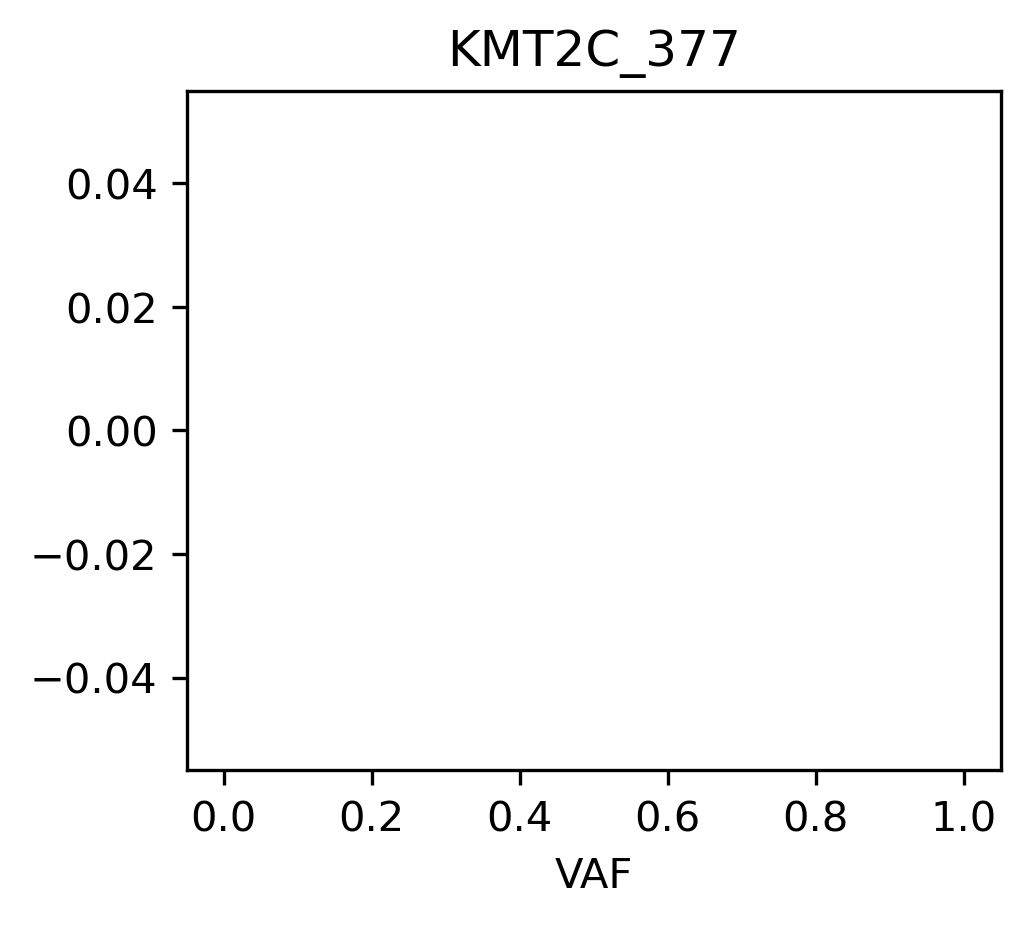

In [185]:
VAF_KMT2C_377 = CH_mutations[(CH_mutations['SYMBOL'] == 'KMT2C') & (CH_mutations['Prot_pos'] == '377')]['VAF_alt']

plt.hist(VAF_KMT2C_377, 100)
plt.xlabel('VAF')
plt.title('KMT2C_377')
plt.show()

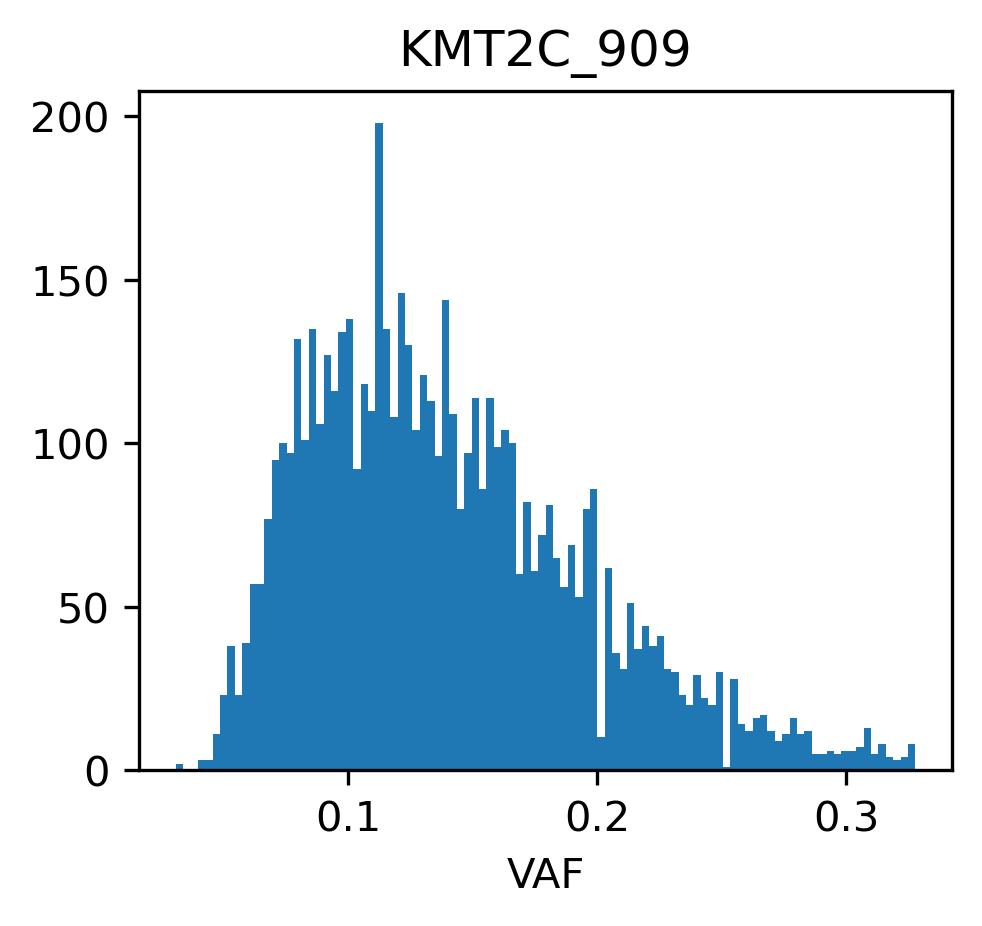

In [186]:
VAF_KMT2C_909 = CH_mutations[(CH_mutations['SYMBOL'] == 'KMT2C') & (CH_mutations['Prot_pos'] == '909')]['VAF_alt']

plt.hist(VAF_KMT2C_909, 100)
plt.xlabel('VAF')
plt.title('KMT2C_909')
plt.show()

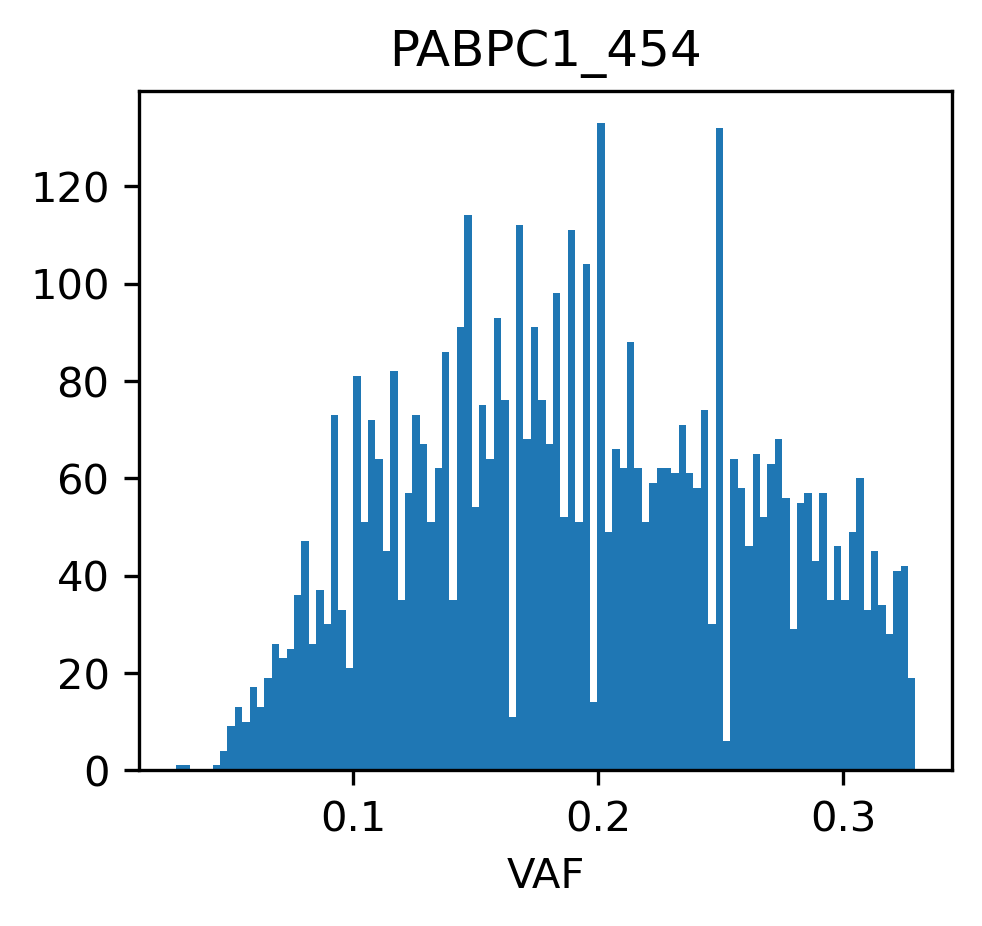

In [142]:
VAF_PABPC1_454 = CH_mutations[(CH_mutations['SYMBOL'] == 'PABPC1') & (CH_mutations['Prot_pos'] == '454')]['VAF_alt']

plt.hist(VAF_PABPC1_454, 100)
plt.xlabel('VAF')
plt.title('PABPC1_454')
plt.show()

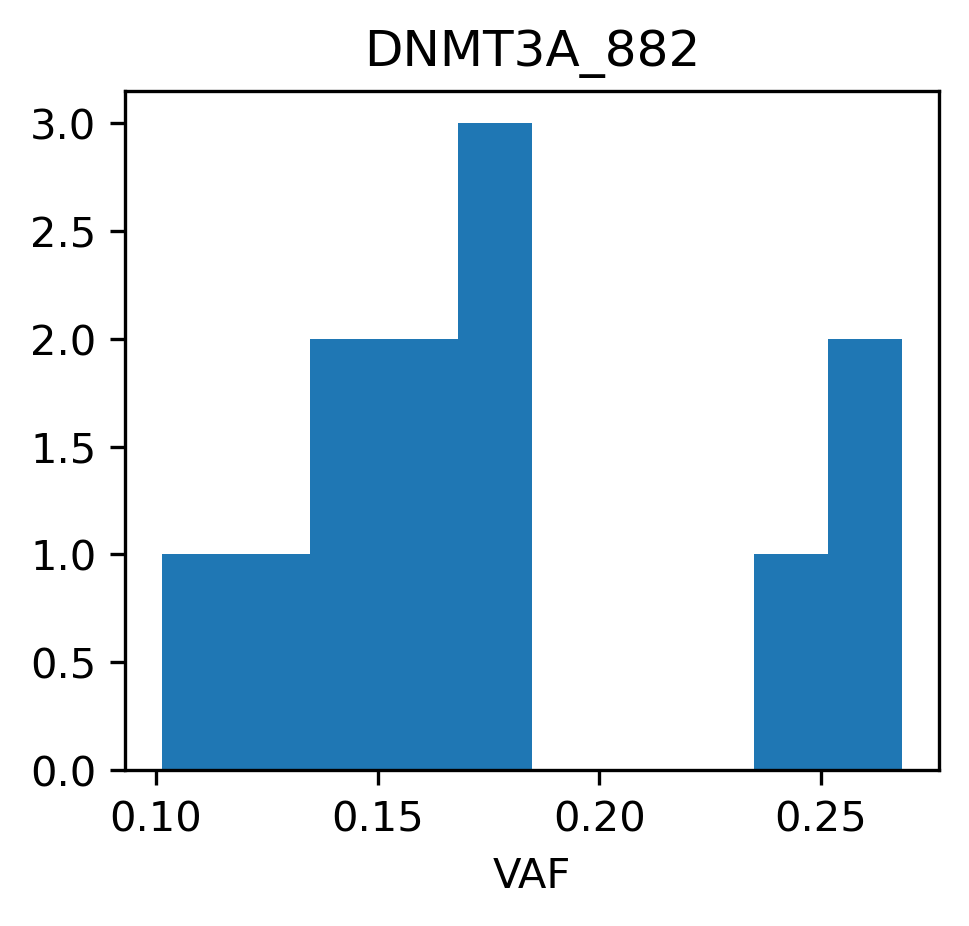

In [143]:
VAF_DNMT3A_882 = CH_mutations[(CH_mutations['SYMBOL'] == 'DNMT3A') & (CH_mutations['Prot_pos'] == '882')]['VAF_alt']

plt.hist(VAF_DNMT3A_882, 10)
plt.xlabel('VAF')
plt.title('DNMT3A_882')
plt.show()

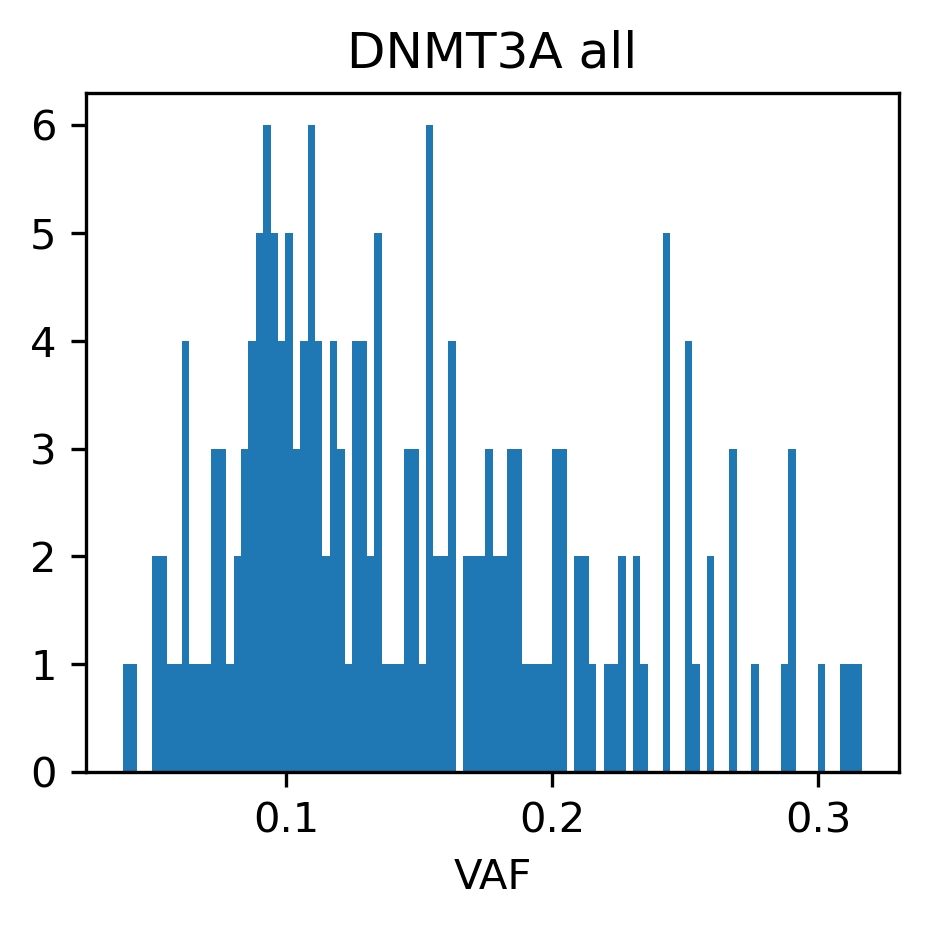

In [144]:
VAF_DNMT3A = CH_mutations[(CH_mutations['SYMBOL'] == 'DNMT3A')]['VAF_alt']
plt.hist(VAF_DNMT3A, 100)
plt.xlabel('VAF')
plt.title('DNMT3A all')
plt.show()

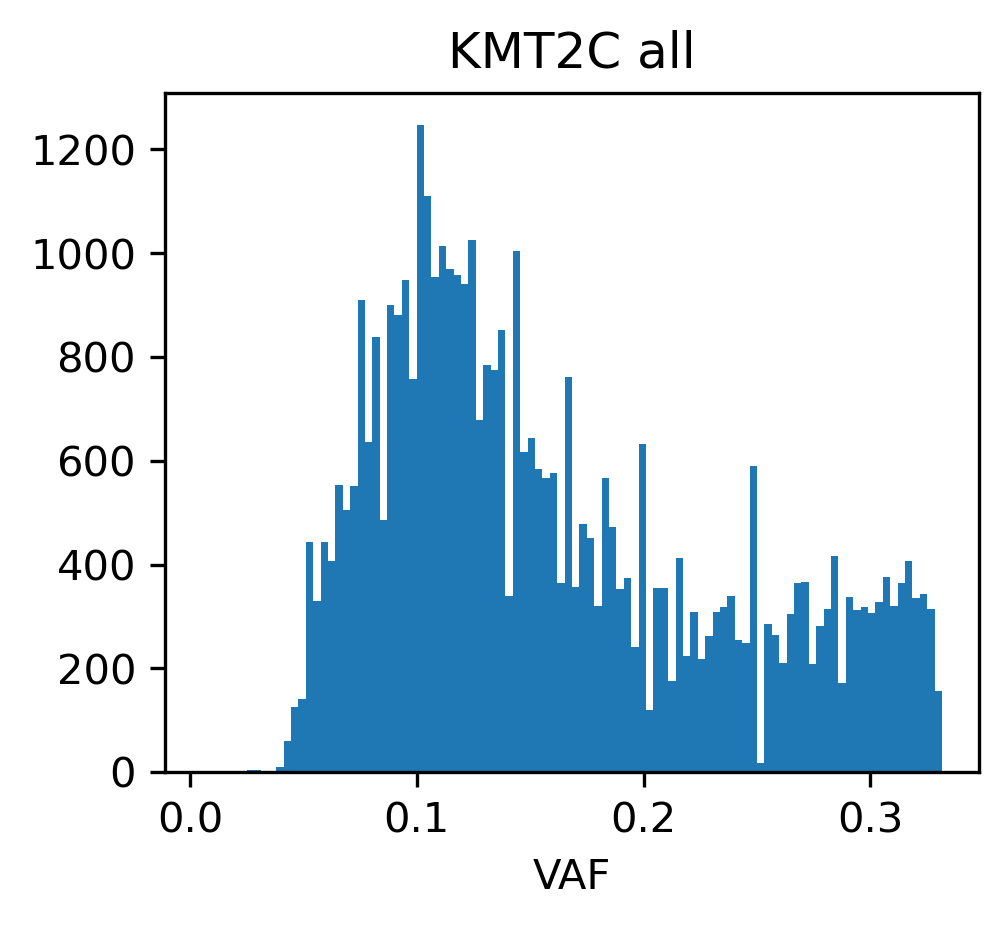

In [145]:
VAF_KMT2C = CH_mutations[(CH_mutations['SYMBOL'] == 'KMT2C')]['VAF_alt']
plt.hist(VAF_KMT2C, 100)
plt.xlabel('VAF')
plt.title('KMT2C all')
plt.show()


# 4. SELECT SEVERE CONSEQUENCE

In [189]:
severe_selection = "transcript_ablation|splice_acceptor_variant|splice_donor_variant|stop_gained|frameshift_variant|stop_lost|start_lost|transcript_amplification|inframe_insertion|inframe_deletion|missense_variant"
severe_selection = "transcript_ablation|splice_acceptor_variant|splice_donor_variant|stop_gained|frameshift_variant|stop_lost|start_lost|transcript_amplification|inframe_insertion|inframe_deletion|missense_variant|protein_altering_variant|splice_region_variant|incomplete_terminal_codon_variant|start_retained_variant|stop_retained_variant"
CH_mutations_severe = CH_mutations[CH_mutations['Consequence'].str.contains(severe_selection, na=False)]
CH_mutations_severe

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient
0,1,204532210,.,A,G,0.00,2,17,0.117647,0.882353,1,SNV,missense_variant,MODERATE,MDM4,ENST00000367182,307,103,R/G,NaN,ENSP00000356150,NaN,NaN,0/0,"15,2,0",2,NaN,NaN,"0,2,477,45,483,526","11,4,1,1",BaseQRankSum=-1.345;DP=17;ExcessHet=3.0103;MLE...,G|missense_variant|MODERATE|MDM4|ENSG000001986...,.,CSQ=G|missense_variant|MODERATE|MDM4|ENSG00000...,4033478
1,7,152235860,rs199504848,C,T,0.13,6,62,0.096774,0.903226,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.013970,0.018870,0/1,"56,6,0",13,NaN,NaN,"13,0,1714,181,1732,1913","34,22,4,2",BaseQRankSum=0.288;DB;DP=62;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478
2,7,152238768,rs4024420,T,C,0.75,4,28,0.142857,0.857143,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2591,864,E/G,rs4024420,ENSP00000262189,0.041240,0.051350,0/1,"24,4,0",21,NaN,NaN,"21,0,703,93,715,808","12,12,0,4",BaseQRankSum=3.245;DB;DP=28;ExcessHet=3.0103;M...,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478
3,7,152238825,rs4024419,C,T,12.99,4,20,0.200000,0.800000,1,SNV,missense_variant&splice_region_variant,MODERATE,KMT2C,ENST00000262189,2534,845,G/E,rs4024419,ENSP00000262189,0.019910,0.028420,0/1,"16,4,0",41,NaN,NaN,"41,0,505,89,517,606","5,11,0,4",BaseQRankSum=0.049;DB;DP=20;ExcessHet=3.0103;M...,CSQ=T|missense_variant&splice_region_variant|M...,.,CSQ=T|missense_variant&splice_region_variant|M...,4033478
4,7,152247986,rs150073007,G,GT,166.73,9,44,0.204545,0.795455,1,Indel,stop_gained&frameshift_variant,HIGH,KMT2C,ENST00000262189,2447-2448,816,Y/*,rs150073007,ENSP00000262189,0.487200,0.484900,0/1,"35,9,0",99,NaN,NaN,"204,0,1155,310,1182,1491","26,9,5,4",BaseQRankSum=-0.888;DB;DP=46;ExcessHet=3.0103;...,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,.,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,4033478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70166,12,45850657,rs145274890,C,G,426.77,14,45,0.311111,0.688889,1,SNV,missense_variant,MODERATE,ARID2,ENST00000334344,2534,845,T/S,rs145274890,ENSP00000335044,0.000012,0.000026,0/1,"31,14,0",99,NaN,NaN,"455,0,1003,548,1045,1593","15,16,9,5",BaseQRankSum=1.760;DB;DP=46;ExcessHet=3.0103;M...,CSQ=G|missense_variant|MODERATE|ARID2|ENSG0000...,.,CSQ=G|missense_variant|MODERATE|ARID2|ENSG0000...,5106053
70167,12,111446804,rs3184504,T,C,210.77,13,50,0.260000,0.740000,1,SNV,missense_variant,MODERATE,SH2B3,ENST00000341259,784,262,W/R,rs3184504&CM084630,ENSP00000345492,0.667400,0.511200,0/1,"37,13,0",99,NaN,NaN,"239,0,954,350,993,1343","19,18,6,7",BaseQRankSum=-0.181;DB;DP=50;ExcessHet=3.0103;...,CSQ=C|missense_variant|MODERATE|SH2B3|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|SH2B3|ENSG0000...,5106053
70168,X,44961367,.,C,A,0.13,2,12,0.166667,0.833333,1,SNV,missense_variant,MODERATE,KDM6A,ENST00000377967,309,103,N/K,NaN,ENSP00000367203,NaN,NaN,0/1,"10,2,0",13,NaN,NaN,"13,0,391,43,397,440","3,7,1,1",BaseQRankSum=-2.085;DP=12;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|KDM6A|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|KDM6A|ENSG0000...,5106053
70169,X,45079158,.,T,C,0.25,2,11,0.181818,0.818182,1,SNV,missense_variant,MODERATE,KDM6A,ENST00000377967,2951,984,F/S,COSV65043243,ENSP00000367203,NaN,NaN,0/1,"9,2,0",16,NaN,NaN,"16,0,290,43,296,339","8,1,1,1",BaseQRankSum=-1.602;DP=11;ExcessHet=3.0103;MLE...,CSQ=C|missense_variant|MODERATE|KDM6A|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KDM6A|ENSG0000...,5106053


In [190]:
CH_mutations_severe['Consequence'].value_counts()

missense_variant                                                  111243
missense_variant&splice_region_variant                              7969
stop_gained&frameshift_variant                                      6753
frameshift_variant                                                  5586
stop_gained                                                         3517
frameshift_variant&splice_region_variant                            2373
inframe_deletion                                                    1505
inframe_insertion&splice_region_variant                              945
splice_region_variant&synonymous_variant                             420
inframe_insertion                                                    186
stop_gained&splice_region_variant                                     72
splice_acceptor_variant&coding_sequence_variant                       61
splice_acceptor_variant&coding_sequence_variant&intron_variant        30
stop_lost                                          

In [148]:
CH_mutations_severe['IMPACT'].value_counts()

MODERATE    121851
HIGH         18450
LOW            431
Name: IMPACT, dtype: int64

In [149]:
CH_mutations['IMPACT'].value_counts()

MODERATE    121851
HIGH         18450
LOW            431
Name: IMPACT, dtype: int64

# 5. EXCLUDE MUTATIONS PRESENT IN GNOMAD (VEP ANNOTATION)

In [150]:
### EXCLUDE gnomAD

### gnomAD AF
CH_mutations_gnomAD = CH_mutations[CH_mutations['gnomAD_AF'].notnull()]
CH_mutations_gnomAD

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient
1,7,152235860,rs199504848,C,T,0.13,6,62,0.096774,0.903226,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.013970,0.018870,0/1,"56,6,0",13,NaN,NaN,"13,0,1714,181,1732,1913","34,22,4,2",BaseQRankSum=0.288;DB;DP=62;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478
2,7,152238768,rs4024420,T,C,0.75,4,28,0.142857,0.857143,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2591,864,E/G,rs4024420,ENSP00000262189,0.041240,0.051350,0/1,"24,4,0",21,NaN,NaN,"21,0,703,93,715,808","12,12,0,4",BaseQRankSum=3.245;DB;DP=28;ExcessHet=3.0103;M...,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478
3,7,152238825,rs4024419,C,T,12.99,4,20,0.200000,0.800000,1,SNV,missense_variant&splice_region_variant,MODERATE,KMT2C,ENST00000262189,2534,845,G/E,rs4024419,ENSP00000262189,0.019910,0.028420,0/1,"16,4,0",41,NaN,NaN,"41,0,505,89,517,606","5,11,0,4",BaseQRankSum=0.049;DB;DP=20;ExcessHet=3.0103;M...,CSQ=T|missense_variant&splice_region_variant|M...,.,CSQ=T|missense_variant&splice_region_variant|M...,4033478
4,7,152247986,rs150073007,G,GT,166.73,9,44,0.204545,0.795455,1,Indel,stop_gained&frameshift_variant,HIGH,KMT2C,ENST00000262189,2447-2448,816,Y/*,rs150073007,ENSP00000262189,0.487200,0.484900,0/1,"35,9,0",99,NaN,NaN,"204,0,1155,310,1182,1491","26,9,5,4",BaseQRankSum=-0.888;DB;DP=46;ExcessHet=3.0103;...,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,.,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,4033478
5,7,152273846,rs56850341,G,A,0.00,5,51,0.098039,0.901961,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,871,291,L/F,rs56850341,ENSP00000262189,0.499900,0.499900,0/0,"46,5,0",7,NaN,NaN,"0,7,1499,138,1514,1646","19,27,0,5",BaseQRankSum=-0.958;DB;DP=51;ExcessHet=3.0103;...,CSQ=A|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70163,7,152238768,rs4024420,T,C,0.13,4,31,0.129032,0.870968,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2591,864,E/G,rs4024420,ENSP00000262189,0.041240,0.051350,0/1,"27,4,0",13,NaN,NaN,"13,0,825,94,837,931","12,15,0,4",BaseQRankSum=1.912;DB;DP=31;ExcessHet=3.0103;M...,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,5106053
70164,7,152247986,rs150073007,G,GT,320.73,14,54,0.259259,0.740741,1,Indel,stop_gained&frameshift_variant,HIGH,KMT2C,ENST00000262189,2447-2448,816,Y/*,rs150073007,ENSP00000262189,0.487200,0.484900,0/1,"40,14,0",99,NaN,NaN,"358,0,1297,479,1339,1817","27,13,9,5",BaseQRankSum=-0.459;DB;DP=56;ExcessHet=3.0103;...,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,.,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,5106053
70165,8,100705604,rs75035099,G,C,0.05,2,16,0.125000,0.875000,1,SNV,missense_variant,MODERATE,PABPC1,ENST00000318607,1672,558,Q/E,rs75035099,ENSP00000313007,0.045100,0.052870,0/1,"14,2,0",9,NaN,NaN,"9,0,495,51,501,552","10,4,1,1",BaseQRankSum=-0.407;DB;DP=16;ExcessHet=3.0103;...,CSQ=C|missense_variant|MODERATE|PABPC1|ENSG000...,.,CSQ=C|missense_variant|MODERATE|PABPC1|ENSG000...,5106053
70166,12,45850657,rs145274890,C,G,426.77,14,45,0.311111,0.688889,1,SNV,missense_variant,MODERATE,ARID2,ENST00000334344,2534,845,T/S,rs145274890,ENSP00000335044,0.000012,0.000026,0/1,"31,14,0",99,NaN,NaN,"455,0,1003,548,1045,1593","15,16,9,5",BaseQRankSum=1.760;DB;DP=46;ExcessHet=3.0103;M...,CSQ=G|missense_variant|MODERATE|ARID2|ENSG0000...,.,CSQ=G|missense_variant|MODERATE|ARID2|ENSG0000...,5106053


In [151]:
CH_mutations_gnomAD.describe()

,POS,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,gnomAD_AF,gnomAD_AF_NFE,GQ,patient
count,1.118050e+05,111805.000000,111805.000000,111805.000000,111805.000000,111805.000000,111805.000000,111805.000000,111805.000000,111805.000000,1.118050e+05
mean,1.197472e+08,86.910046,6.939815,47.907330,0.150252,0.849364,1.002943,0.157173,0.159988,59.658423,4.601231e+06
std,3.341553e+07,136.773520,5.136027,27.372649,0.077729,0.078325,0.054166,0.175151,0.173888,35.946692,3.873433e+05
min,1.787332e+06,0.000000,2.000000,7.000000,0.005333,0.000000,1.000000,0.000000,0.000000,0.000000,4.033478e+06
25%,1.007067e+08,0.010000,4.000000,32.000000,0.088889,0.800000,1.000000,0.013970,0.018870,26.000000,4.282503e+06
50%,1.007095e+08,24.780000,5.000000,43.000000,0.127273,0.872340,1.000000,0.088980,0.091720,59.000000,4.531626e+06
75%,1.522388e+08,122.730000,9.000000,56.000000,0.200000,0.911111,1.000000,0.237500,0.246800,99.000000,4.869545e+06
max,2.082485e+08,6014.770000,86.000000,625.000000,0.331606,0.972603,2.000000,1.000000,1.000000,99.000000,5.944965e+06


In [152]:
CH_mutations_gnomAD.groupby(['#CHROM', 'POS']).size()

#CHROM  POS      
1       1787332       1
        1793247       1
        1815790       8
        43338228      1
        43338669     48
                     ..
X       124071210     1
        124071217     1
        124071294     1
        124076353     1
        124076373     1
Length: 1825, dtype: int64

In [153]:
# Exclude variants gnomAD

CH_mutations_NOgnomad = CH_mutations[~CH_mutations['gnomAD_AF'].notnull()]
CH_mutations_NOgnomad

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient
0,1,204532210,.,A,G,0.00,2,17,0.117647,0.882353,1,SNV,missense_variant,MODERATE,MDM4,ENST00000367182,307,103,R/G,NaN,ENSP00000356150,NaN,NaN,0/0,"15,2,0",2,NaN,NaN,"0,2,477,45,483,526","11,4,1,1",BaseQRankSum=-1.345;DP=17;ExcessHet=3.0103;MLE...,G|missense_variant|MODERATE|MDM4|ENSG000001986...,.,CSQ=G|missense_variant|MODERATE|MDM4|ENSG00000...,4033478
6,10,121836753,.,A,G,0.00,2,22,0.090909,0.909091,1,SNV,missense_variant,MODERATE,ATE1,ENST00000224652,1222,408,F/L,NaN,ENSP00000224652,NaN,NaN,0/0,"20,2,0",17,NaN,NaN,"0,17,707,60,713,757","11,9,1,1",BaseQRankSum=-1.810;DP=22;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|ATE1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|ATE1|ENSG00000...,4033478
7,X,124061768,.,TAGCAC,T,0.00,2,28,0.071429,0.928571,1,Indel,splice_acceptor_variant&coding_sequence_variant,HIGH,STAG2,ENST00000371145,?-1537,?-513,NaN,NaN,ENSP00000360187,NaN,NaN,0/0,"26,2,0",28,NaN,NaN,"0,28,1074,80,1080,1132","18,8,2,0",BaseQRankSum=1.055;DP=29;ExcessHet=3.0103;MLEA...,-|splice_acceptor_variant&coding_sequence_vari...,.,CSQ=-|splice_acceptor_variant&coding_sequence_...,4033478
15,12,49030384,.,GGGGGT,G,0.00,2,38,0.052632,0.947368,1,Indel,frameshift_variant,HIGH,KMT2D,ENST00000301067,13890-13894,4630-4632,PPP/PX,NaN,ENSP00000301067,NaN,NaN,0/0,"36,2,0",24,NaN,NaN,"0,24,1469,108,1475,1560","12,24,1,1",BaseQRankSum=-1.312;DP=46;ExcessHet=3.0103;MLE...,CSQ=-|frameshift_variant|HIGH|KMT2D|ENSG000001...,.,CSQ=-|frameshift_variant|HIGH|KMT2D|ENSG000001...,4034157
17,22,20983036,rs13054014,G,C,958.77,2,98,0.020408,0.602041,2,SNV,missense_variant,MODERATE,LZTR1,ENST00000646124,210,70,K/N,NaN,ENSP00000496779,NaN,NaN,0/1,"59,37,2,0",99,NaN,NaN,"987,0,1762,1117,1833,2990,1163,1875,2995,3038","36,23,28,11",BaseQRankSum=-1.630;DB;DP=98;ExcessHet=3.0103;...,C|missense_variant|MODERATE|LZTR1|ENSG00000099...,.,CSQ=C|downstream_gene_variant|MODIFIER|AIFM3|E...,4034157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70159,1,179109034,rs868612829,A,C,0.00,2,30,0.066667,0.933333,1,SNV,missense_variant,MODERATE,ABL2,ENST00000502732,2233,745,W/G,rs868612829,ENSP00000427562,NaN,NaN,0/0,"28,2,0",35,0|1,179109034_A_C,"0,35,3934,84,3939,3989","3,25,2,0",BaseQRankSum=-2.077;DB;DP=30;ExcessHet=3.0103;...,C|missense_variant|MODERATE|ABL2|ENSG000001433...,.,CSQ=C|intron_variant|MODIFIER|ABL2|ENSG0000014...,5106053
70160,2,197421036,.,G,T,0.01,2,16,0.125000,0.875000,1,SNV,missense_variant,MODERATE,SF3B1,ENST00000335508,293,98,T/K,NaN,ENSP00000335321,NaN,NaN,0/1,"14,2,0",1,NaN,NaN,"1,0,554,43,560,604","13,1,1,1",BaseQRankSum=-2.176;DP=16;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant|MODERATE|SF3B1|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|SF3B1|ENSG0000...,5106053
70168,X,44961367,.,C,A,0.13,2,12,0.166667,0.833333,1,SNV,missense_variant,MODERATE,KDM6A,ENST00000377967,309,103,N/K,NaN,ENSP00000367203,NaN,NaN,0/1,"10,2,0",13,NaN,NaN,"13,0,391,43,397,440","3,7,1,1",BaseQRankSum=-2.085;DP=12;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|KDM6A|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|KDM6A|ENSG0000...,5106053
70169,X,45079158,.,T,C,0.25,2,11,0.181818,0.818182,1,SNV,missense_variant,MODERATE,KDM6A,ENST00000377967,2951,984,F/S,COSV65043243,ENSP00000367203,NaN,NaN,0/1,"9,2,0",16,NaN,NaN,"16,0,290,43,296,339","8,1,1,1",BaseQRankSum=-1.602;DP=11;ExcessHet=3.0103;MLE...,CSQ=C|missense_variant|MODERATE|KDM6A|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KDM6A|ENSG0000...,5106053


In [154]:
### Patients with CH mutations

CH_mutations_NOgnomad['patient'].value_counts()

4507218    14
4447254    14
4070259    13
4421084    12
5064582    12
           ..
4412065     1
4098947     1
5149337     1
4592265     1
4429827     1
Name: patient, Length: 9149, dtype: int64

In [155]:
# Number of mutations per patient

round(CH_mutations_NOgnomad['patient'].value_counts().describe(),1)

count    9149.0
mean        3.2
std         1.8
min         1.0
25%         2.0
50%         3.0
75%         4.0
max        14.0
Name: patient, dtype: float64

In [156]:
### DP and VAF

# 1. ALL

round(CH_mutations[["DP", "VAF_alt"]].describe(), 3)

,DP,VAF_alt
count,140732.000,140732.000
mean,44.278,0.144
std,26.280,0.075
min,7.000,0.005
25%,29.000,0.085
50%,39.000,0.123
75%,53.000,0.185
max,625.000,0.332


In [157]:
# 2. Excluding gnomAD

round(CH_mutations_NOgnomad[["DP", "VAF_alt"]].describe(), 3)


,DP,VAF_alt
count,28927.000,28927.000
mean,30.250,0.119
std,14.713,0.056
min,7.000,0.009
25%,20.000,0.073
50%,29.000,0.108
75%,36.000,0.152
max,217.000,0.329


In [158]:
### Mutation consequence

print(CH_mutations['Consequence'].value_counts().head()/197887)
print()
print(CH_mutations_NOgnomad['Consequence'].value_counts().head()/33188)

missense_variant                          0.562154
missense_variant&splice_region_variant    0.040270
stop_gained&frameshift_variant            0.034126
frameshift_variant                        0.028228
stop_gained                               0.017773
Name: Consequence, dtype: float64

missense_variant                           0.641407
missense_variant&splice_region_variant     0.106243
stop_gained                                0.041521
frameshift_variant                         0.029679
inframe_insertion&splice_region_variant    0.018471
Name: Consequence, dtype: float64


In [159]:
### Mutation IMPACT

print(CH_mutations['IMPACT'].value_counts().head()/197887)
print()
print(CH_mutations_NOgnomad['IMPACT'].value_counts().head()/33188)


MODERATE    0.615761
HIGH        0.093235
LOW         0.002178
Name: IMPACT, dtype: float64

MODERATE    0.777389
HIGH        0.086537
LOW         0.007684
Name: IMPACT, dtype: float64


In [160]:
### Mutations per gene position

CH_mutations_NOgnomad.groupby(['SYMBOL', 'Prot_pos']).size().sort_values(ascending=False).head(20)

SYMBOL  Prot_pos
STAG2   513         2808
ABL2    745         1937
STAG2   513.0       1024
        514          901
NF1     188          895
PABPC1  446          636
RUNX1   424          497
STAG2   342          432
        343          388
NF1     188.0        345
ABL2    745.0        302
STAG2   514.0        300
PABPC1  446.0        241
RUNX1   422          225
ATE1    51           217
NF1     186          200
RAD21   276          194
RUNX1   424.0        194
ATM     414          193
KMT2D   4629         189
dtype: int64

In [161]:
### MUTATIONS DNMT3A

# With gnomAD
CH_mutations[CH_mutations['SYMBOL'] == 'DNMT3A'].groupby(['Prot_pos']).size().sort_values(ascending=False).head()

Prot_pos
882      12
882.0     6
735       5
635       5
736       4
dtype: int64

In [162]:
# Excluding gnomAD
CH_mutations_NOgnomad[CH_mutations_NOgnomad['SYMBOL'] == 'DNMT3A'].groupby(['Prot_pos']).size().sort_values(ascending=False).head()

Prot_pos
866      4
770      2
866.0    2
634      2
865      2
dtype: int64

In [163]:
### MUTATIONS JAK2

# With gnomAD
CH_mutations[CH_mutations['SYMBOL'] == 'JAK2'].groupby(['Prot_pos']).size().sort_values(ascending=False).head()

Prot_pos
1063     22
393      20
163      10
1108     10
393.0     8
dtype: int64

In [164]:
# Excluding gnomAD
CH_mutations_NOgnomad[CH_mutations_NOgnomad['SYMBOL'] == 'JAK2'].groupby(['Prot_pos']).size().sort_values(ascending=False).head()

Prot_pos
163    10
841     7
160     6
175     5
174     5
dtype: int64

# 6. FILTER LOWER VAF OR HIGHER AD

In [165]:
CH_mutations

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient
0,1,204532210,.,A,G,0.00,2,17,0.117647,0.882353,1,SNV,missense_variant,MODERATE,MDM4,ENST00000367182,307,103,R/G,NaN,ENSP00000356150,NaN,NaN,0/0,"15,2,0",2,NaN,NaN,"0,2,477,45,483,526","11,4,1,1",BaseQRankSum=-1.345;DP=17;ExcessHet=3.0103;MLE...,G|missense_variant|MODERATE|MDM4|ENSG000001986...,.,CSQ=G|missense_variant|MODERATE|MDM4|ENSG00000...,4033478
1,7,152235860,rs199504848,C,T,0.13,6,62,0.096774,0.903226,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.013970,0.018870,0/1,"56,6,0",13,NaN,NaN,"13,0,1714,181,1732,1913","34,22,4,2",BaseQRankSum=0.288;DB;DP=62;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478
2,7,152238768,rs4024420,T,C,0.75,4,28,0.142857,0.857143,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2591,864,E/G,rs4024420,ENSP00000262189,0.041240,0.051350,0/1,"24,4,0",21,NaN,NaN,"21,0,703,93,715,808","12,12,0,4",BaseQRankSum=3.245;DB;DP=28;ExcessHet=3.0103;M...,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478
3,7,152238825,rs4024419,C,T,12.99,4,20,0.200000,0.800000,1,SNV,missense_variant&splice_region_variant,MODERATE,KMT2C,ENST00000262189,2534,845,G/E,rs4024419,ENSP00000262189,0.019910,0.028420,0/1,"16,4,0",41,NaN,NaN,"41,0,505,89,517,606","5,11,0,4",BaseQRankSum=0.049;DB;DP=20;ExcessHet=3.0103;M...,CSQ=T|missense_variant&splice_region_variant|M...,.,CSQ=T|missense_variant&splice_region_variant|M...,4033478
4,7,152247986,rs150073007,G,GT,166.73,9,44,0.204545,0.795455,1,Indel,stop_gained&frameshift_variant,HIGH,KMT2C,ENST00000262189,2447-2448,816,Y/*,rs150073007,ENSP00000262189,0.487200,0.484900,0/1,"35,9,0",99,NaN,NaN,"204,0,1155,310,1182,1491","26,9,5,4",BaseQRankSum=-0.888;DB;DP=46;ExcessHet=3.0103;...,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,.,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,4033478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70166,12,45850657,rs145274890,C,G,426.77,14,45,0.311111,0.688889,1,SNV,missense_variant,MODERATE,ARID2,ENST00000334344,2534,845,T/S,rs145274890,ENSP00000335044,0.000012,0.000026,0/1,"31,14,0",99,NaN,NaN,"455,0,1003,548,1045,1593","15,16,9,5",BaseQRankSum=1.760;DB;DP=46;ExcessHet=3.0103;M...,CSQ=G|missense_variant|MODERATE|ARID2|ENSG0000...,.,CSQ=G|missense_variant|MODERATE|ARID2|ENSG0000...,5106053
70167,12,111446804,rs3184504,T,C,210.77,13,50,0.260000,0.740000,1,SNV,missense_variant,MODERATE,SH2B3,ENST00000341259,784,262,W/R,rs3184504&CM084630,ENSP00000345492,0.667400,0.511200,0/1,"37,13,0",99,NaN,NaN,"239,0,954,350,993,1343","19,18,6,7",BaseQRankSum=-0.181;DB;DP=50;ExcessHet=3.0103;...,CSQ=C|missense_variant|MODERATE|SH2B3|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|SH2B3|ENSG0000...,5106053
70168,X,44961367,.,C,A,0.13,2,12,0.166667,0.833333,1,SNV,missense_variant,MODERATE,KDM6A,ENST00000377967,309,103,N/K,NaN,ENSP00000367203,NaN,NaN,0/1,"10,2,0",13,NaN,NaN,"13,0,391,43,397,440","3,7,1,1",BaseQRankSum=-2.085;DP=12;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|KDM6A|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|KDM6A|ENSG0000...,5106053
70169,X,45079158,.,T,C,0.25,2,11,0.181818,0.818182,1,SNV,missense_variant,MODERATE,KDM6A,ENST00000377967,2951,984,F/S,COSV65043243,ENSP00000367203,NaN,NaN,0/1,"9,2,0",16,NaN,NaN,"16,0,290,43,296,339","8,1,1,1",BaseQRankSum=-1.602;DP=11;ExcessHet=3.0103;MLE...,CSQ=C|missense_variant|MODERATE|KDM6A|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KDM6A|ENSG0000...,5106053


In [166]:
CH_mutations_20 = CH_mutations[CH_mutations['VAF_alt'] < 0.2]
CH_mutations_20

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient
0,1,204532210,.,A,G,0.00,2,17,0.117647,0.882353,1,SNV,missense_variant,MODERATE,MDM4,ENST00000367182,307,103,R/G,NaN,ENSP00000356150,NaN,NaN,0/0,"15,2,0",2,NaN,NaN,"0,2,477,45,483,526","11,4,1,1",BaseQRankSum=-1.345;DP=17;ExcessHet=3.0103;MLE...,G|missense_variant|MODERATE|MDM4|ENSG000001986...,.,CSQ=G|missense_variant|MODERATE|MDM4|ENSG00000...,4033478
1,7,152235860,rs199504848,C,T,0.13,6,62,0.096774,0.903226,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.01397,0.01887,0/1,"56,6,0",13,NaN,NaN,"13,0,1714,181,1732,1913","34,22,4,2",BaseQRankSum=0.288;DB;DP=62;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478
2,7,152238768,rs4024420,T,C,0.75,4,28,0.142857,0.857143,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2591,864,E/G,rs4024420,ENSP00000262189,0.04124,0.05135,0/1,"24,4,0",21,NaN,NaN,"21,0,703,93,715,808","12,12,0,4",BaseQRankSum=3.245;DB;DP=28;ExcessHet=3.0103;M...,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478
5,7,152273846,rs56850341,G,A,0.00,5,51,0.098039,0.901961,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,871,291,L/F,rs56850341,ENSP00000262189,0.49990,0.49990,0/0,"46,5,0",7,NaN,NaN,"0,7,1499,138,1514,1646","19,27,0,5",BaseQRankSum=-0.958;DB;DP=51;ExcessHet=3.0103;...,CSQ=A|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478
6,10,121836753,.,A,G,0.00,2,22,0.090909,0.909091,1,SNV,missense_variant,MODERATE,ATE1,ENST00000224652,1222,408,F/L,NaN,ENSP00000224652,NaN,NaN,0/0,"20,2,0",17,NaN,NaN,"0,17,707,60,713,757","11,9,1,1",BaseQRankSum=-1.810;DP=22;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|ATE1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|ATE1|ENSG00000...,4033478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70163,7,152238768,rs4024420,T,C,0.13,4,31,0.129032,0.870968,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2591,864,E/G,rs4024420,ENSP00000262189,0.04124,0.05135,0/1,"27,4,0",13,NaN,NaN,"13,0,825,94,837,931","12,15,0,4",BaseQRankSum=1.912;DB;DP=31;ExcessHet=3.0103;M...,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,5106053
70165,8,100705604,rs75035099,G,C,0.05,2,16,0.125000,0.875000,1,SNV,missense_variant,MODERATE,PABPC1,ENST00000318607,1672,558,Q/E,rs75035099,ENSP00000313007,0.04510,0.05287,0/1,"14,2,0",9,NaN,NaN,"9,0,495,51,501,552","10,4,1,1",BaseQRankSum=-0.407;DB;DP=16;ExcessHet=3.0103;...,CSQ=C|missense_variant|MODERATE|PABPC1|ENSG000...,.,CSQ=C|missense_variant|MODERATE|PABPC1|ENSG000...,5106053
70168,X,44961367,.,C,A,0.13,2,12,0.166667,0.833333,1,SNV,missense_variant,MODERATE,KDM6A,ENST00000377967,309,103,N/K,NaN,ENSP00000367203,NaN,NaN,0/1,"10,2,0",13,NaN,NaN,"13,0,391,43,397,440","3,7,1,1",BaseQRankSum=-2.085;DP=12;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|KDM6A|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|KDM6A|ENSG0000...,5106053
70169,X,45079158,.,T,C,0.25,2,11,0.181818,0.818182,1,SNV,missense_variant,MODERATE,KDM6A,ENST00000377967,2951,984,F/S,COSV65043243,ENSP00000367203,NaN,NaN,0/1,"9,2,0",16,NaN,NaN,"16,0,290,43,296,339","8,1,1,1",BaseQRankSum=-1.602;DP=11;ExcessHet=3.0103;MLE...,CSQ=C|missense_variant|MODERATE|KDM6A|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KDM6A|ENSG0000...,5106053


In [167]:
CH_mutations_3 = CH_mutations[CH_mutations['AD_alt'] > 3]
CH_mutations_3

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient
1,7,152235860,rs199504848,C,T,0.13,6,62,0.096774,0.903226,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.013970,0.018870,0/1,"56,6,0",13,NaN,NaN,"13,0,1714,181,1732,1913","34,22,4,2",BaseQRankSum=0.288;DB;DP=62;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478
2,7,152238768,rs4024420,T,C,0.75,4,28,0.142857,0.857143,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2591,864,E/G,rs4024420,ENSP00000262189,0.041240,0.051350,0/1,"24,4,0",21,NaN,NaN,"21,0,703,93,715,808","12,12,0,4",BaseQRankSum=3.245;DB;DP=28;ExcessHet=3.0103;M...,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478
3,7,152238825,rs4024419,C,T,12.99,4,20,0.200000,0.800000,1,SNV,missense_variant&splice_region_variant,MODERATE,KMT2C,ENST00000262189,2534,845,G/E,rs4024419,ENSP00000262189,0.019910,0.028420,0/1,"16,4,0",41,NaN,NaN,"41,0,505,89,517,606","5,11,0,4",BaseQRankSum=0.049;DB;DP=20;ExcessHet=3.0103;M...,CSQ=T|missense_variant&splice_region_variant|M...,.,CSQ=T|missense_variant&splice_region_variant|M...,4033478
4,7,152247986,rs150073007,G,GT,166.73,9,44,0.204545,0.795455,1,Indel,stop_gained&frameshift_variant,HIGH,KMT2C,ENST00000262189,2447-2448,816,Y/*,rs150073007,ENSP00000262189,0.487200,0.484900,0/1,"35,9,0",99,NaN,NaN,"204,0,1155,310,1182,1491","26,9,5,4",BaseQRankSum=-0.888;DB;DP=46;ExcessHet=3.0103;...,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,.,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,4033478
5,7,152273846,rs56850341,G,A,0.00,5,51,0.098039,0.901961,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,871,291,L/F,rs56850341,ENSP00000262189,0.499900,0.499900,0/0,"46,5,0",7,NaN,NaN,"0,7,1499,138,1514,1646","19,27,0,5",BaseQRankSum=-0.958;DB;DP=51;ExcessHet=3.0103;...,CSQ=A|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70162,7,152235860,rs199504848,C,T,0.00,4,38,0.105263,0.894737,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.013970,0.018870,0/0,"34,4,0",2,NaN,NaN,"0,2,1097,102,1109,1209","18,16,4,0",BaseQRankSum=-1.295;DB;DP=38;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,5106053
70163,7,152238768,rs4024420,T,C,0.13,4,31,0.129032,0.870968,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2591,864,E/G,rs4024420,ENSP00000262189,0.041240,0.051350,0/1,"27,4,0",13,NaN,NaN,"13,0,825,94,837,931","12,15,0,4",BaseQRankSum=1.912;DB;DP=31;ExcessHet=3.0103;M...,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,5106053
70164,7,152247986,rs150073007,G,GT,320.73,14,54,0.259259,0.740741,1,Indel,stop_gained&frameshift_variant,HIGH,KMT2C,ENST00000262189,2447-2448,816,Y/*,rs150073007,ENSP00000262189,0.487200,0.484900,0/1,"40,14,0",99,NaN,NaN,"358,0,1297,479,1339,1817","27,13,9,5",BaseQRankSum=-0.459;DB;DP=56;ExcessHet=3.0103;...,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,.,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,5106053
70166,12,45850657,rs145274890,C,G,426.77,14,45,0.311111,0.688889,1,SNV,missense_variant,MODERATE,ARID2,ENST00000334344,2534,845,T/S,rs145274890,ENSP00000335044,0.000012,0.000026,0/1,"31,14,0",99,NaN,NaN,"455,0,1003,548,1045,1593","15,16,9,5",BaseQRankSum=1.760;DB;DP=46;ExcessHet=3.0103;M...,CSQ=G|missense_variant|MODERATE|ARID2|ENSG0000...,.,CSQ=G|missense_variant|MODERATE|ARID2|ENSG0000...,5106053


In [168]:
CH_mutations_qual40 = CH_mutations[CH_mutations['QUAL'] > 40]
CH_mutations_qual40

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient
4,7,152247986,rs150073007,G,GT,166.73,9,44,0.204545,0.795455,1,Indel,stop_gained&frameshift_variant,HIGH,KMT2C,ENST00000262189,2447-2448,816,Y/*,rs150073007,ENSP00000262189,0.487200,0.484900,0/1,"35,9,0",99,NaN,NaN,"204,0,1155,310,1182,1491","26,9,5,4",BaseQRankSum=-0.888;DB;DP=46;ExcessHet=3.0103;...,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,.,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,4033478
8,7,152229931,rs79608986,T,C,42.77,9,52,0.173077,0.826923,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2968,990,S/G,rs79608986&COSV51283026,ENSP00000262189,0.029900,0.044430,0/1,"43,9,0",71,NaN,NaN,"71,0,1273,200,1300,1500","34,9,7,2",BaseQRankSum=1.149;DB;DP=52;ExcessHet=3.0103;M...,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,4034157
9,7,152229936,rs28522267,C,A,354.77,12,52,0.230769,0.769231,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2963,988,C/F,rs28522267&COSV51275056,ENSP00000262189,0.197700,0.182600,0/1,"40,12,0",99,0|1,152229936_C_A,"383,0,1635,504,1671,2175","29,11,10,2",BaseQRankSum=-0.349;DB;DP=52;ExcessHet=3.0103;...,CSQ=A|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|KMT2C|ENSG0000...,4034157
10,7,152235860,rs199504848,C,T,85.77,13,88,0.147727,0.852273,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.013970,0.018870,0/1,"75,13,0",99,NaN,NaN,"114,0,2318,340,2357,2697","45,30,7,6",BaseQRankSum=-1.160;DB;DP=88;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,4034157
11,7,152247986,rs150073007,G,GT,428.73,19,79,0.240506,0.759494,1,Indel,stop_gained&frameshift_variant,HIGH,KMT2C,ENST00000262189,2447-2448,816,Y/*,rs150073007,ENSP00000262189,0.487200,0.484900,0/1,"60,19,0",99,NaN,NaN,"466,0,1985,646,2042,2688","40,20,7,12",BaseQRankSum=-1.740;DB;DP=83;ExcessHet=3.0103;...,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,.,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,4034157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70150,8,100706971,rs749697639,G,A,148.77,7,44,0.159091,0.840909,1,SNV,missense_variant,MODERATE,PABPC1,ENST00000318607,1363,455,R/C,rs749697639,ENSP00000313007,0.000088,0.000000,0/1,"37,7,0",99,0|1,100706971_G_A,"177,0,1473,288,1494,1782","12,25,2,5",BaseQRankSum=-0.153;DB;DP=44;ExcessHet=3.0103;...,CSQ=A|missense_variant|MODERATE|PABPC1|ENSG000...,.,CSQ=A|missense_variant|MODERATE|PABPC1|ENSG000...,5188927
70151,8,100706973,rs72681439,A,G,148.77,7,40,0.175000,0.825000,1,SNV,missense_variant,MODERATE,PABPC1,ENST00000318607,1361,454,I/T,rs72681439,ENSP00000313007,0.266400,0.283500,0/1,"33,7,0",99,0|1,100706971_G_A,"177,0,1473,288,1494,1782","11,22,2,5",BaseQRankSum=1.422;DB;DP=40;ExcessHet=3.0103;M...,CSQ=G|missense_variant|MODERATE|PABPC1|ENSG000...,.,CSQ=G|missense_variant|MODERATE|PABPC1|ENSG000...,5188927
70164,7,152247986,rs150073007,G,GT,320.73,14,54,0.259259,0.740741,1,Indel,stop_gained&frameshift_variant,HIGH,KMT2C,ENST00000262189,2447-2448,816,Y/*,rs150073007,ENSP00000262189,0.487200,0.484900,0/1,"40,14,0",99,NaN,NaN,"358,0,1297,479,1339,1817","27,13,9,5",BaseQRankSum=-0.459;DB;DP=56;ExcessHet=3.0103;...,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,.,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,5106053
70166,12,45850657,rs145274890,C,G,426.77,14,45,0.311111,0.688889,1,SNV,missense_variant,MODERATE,ARID2,ENST00000334344,2534,845,T/S,rs145274890,ENSP00000335044,0.000012,0.000026,0/1,"31,14,0",99,NaN,NaN,"455,0,1003,548,1045,1593","15,16,9,5",BaseQRankSum=1.760;DB;DP=46;ExcessHet=3.0103;M...,CSQ=G|missense_variant|MODERATE|ARID2|ENSG0000...,.

In [169]:
CH_mutations_qual40.groupby(['SYMBOL', 'Prot_pos']).size().sort_values(ascending=False).head(20)

SYMBOL  Prot_pos
KMT2C   816         4522
PABPC1  454         3710
        475         2712
KMT2C   909         2195
PABPC1  505         2048
        506         2028
KMT2C   816.0       1800
PABPC1  481         1682
KMT2C   988         1599
PABPC1  446         1468
        454.0       1405
KMT2C   316         1341
PABPC1  475.0       1074
        517         1007
KMT2C   864          902
        291          862
        909.0        860
PABPC1  558          808
        505.0        771
        506.0        771
dtype: int64

# FILTER GNOMAD WITH OUR DATA

In [170]:
### Load gnomAD variants hg38
# Obtained in "CHgenes_variantsGnomad_pysam" notebook

ch_gnomad = pd.read_csv("/home/sdemajo/CH_gnomad_2021_02/results/CH_genes_variants.tsv",
                          sep="\t", index_col=0)
ch_gnomad

,Chromosome,Position,rsID,REF,ALT,QUAL,FILTER,Gene,Transcript,AF,controls_AF,non_cancer_AF
0,chr1,1787332,rs747120803,T,C,4570.98,PASS,GNB1,ENST00000378609,0.000016,0.000009,0.000017
1,chr1,1787334,rs1362537090,G,A,314.39,PASS,GNB1,ENST00000378609,0.000004,0.000009,0.000004
3,chr1,1787367,rs750998849,T,C,1667.37,PASS,GNB1,ENST00000378609,0.000004,0.000000,0.000004
4,chr1,1787370,rs139152573,C,T,7962.49,PASS,GNB1,ENST00000378609,0.000036,0.000018,0.000030
6,chr1,1787388,rs766891832,G,A,2299.37,PASS,GNB1,ENST00000378609,0.000004,0.000000,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...
54150,chrX,124095410,rs750598294,G,A,1182.36,PASS,STAG2,ENST00000371145,0.000005,0.000012,0.000006
54151,chrX,124095442,rs1230398678,A,T,3145.36,PASS,STAG2,ENST00000371145,0.000005,0.000000,0.000006
54152,chrX,124095446,rs201262699,A,T,53165.35,PASS,STAG2,ENST00000371145,0.000180,0.000199,0.000157
54153,chrX,124100577,rs1304348952,C,A,1266.82,PASS,STAG2,ENST00000371145,0.000006,0.000013,0.000006


In [171]:
# Modifiy chomosome notation
ch_gnomad['Chromosome'].value_counts()

chr12    6369
chr9     4711
chr7     4590
chr15    3527
chr17    3151
chr11    3020
chr2     2888
chr20    2687
chr22    2295
chr3     2229
chr19    2218
chrX     2145
chr5     2090
chr1     1855
chr4     1448
chr10    1317
chr8      604
chr21     451
chr16     361
Name: Chromosome, dtype: int64

In [172]:
ch_gnomad['Chromosome'] = ch_gnomad['Chromosome'].apply(lambda x: x.lstrip('chr'))

#data['result'] = data['result'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))
ch_gnomad['Chromosome'].value_counts()

12    6369
9     4711
7     4590
15    3527
17    3151
11    3020
2     2888
20    2687
22    2295
3     2229
19    2218
X     2145
5     2090
1     1855
4     1448
10    1317
8      604
21     451
16     361
Name: Chromosome, dtype: int64

In [173]:
#ch_gnomad[(ch_gnomad['Gene'] == 'DNMT3A') % (ch_gnomad['Position'] == '25234374')]
#ch_gnomad[ch_gnomad['Position'] == 25234373]
#ch_gnomad[ch_gnomad['Position'] == 25234374]
gnomad_DNMT3A882 = ch_gnomad[(ch_gnomad['Position'] == 25234373) | (ch_gnomad['Position'] == 25234374)]
gnomad_DNMT3A882

,Chromosome,Position,rsID,REF,ALT,QUAL,FILTER,Gene,Transcript,AF,controls_AF,non_cancer_AF
24691,2,25234373,rs147001633,C,A,33342.06,PASS,DNMT3A,ENST00000264709,0.000004,0.000000,0.000004
24692,2,25234373,rs147001633,C,G,33342.06,PASS,DNMT3A,ENST00000264709,0.000004,0.000009,0.000004
24693,2,25234373,rs147001633,C,T,33342.06,PASS,DNMT3A,ENST00000264709,0.000219,0.000156,0.000216
24694,2,25234374,rs377577594,G,A,17424.90,PASS,DNMT3A,ENST00000264709,0.000123,0.000128,0.000114
24695,2,25234374,rs377577594,G,T,17424.90,PASS,DNMT3A,ENST00000264709,0.000008,0.000009,0.000008


In [174]:
print(gnomad_DNMT3A882['AF'].sum())
print(gnomad_DNMT3A882['AF'].sum()*50000)

0.00035845867
17.9229335


In [175]:
0.000219*50000

10.950000000000001

In [176]:
ch_gnomad['AF'].describe()

count    47956.000000
mean         0.000908
std          0.021169
min          0.000004
25%          0.000004
50%          0.000005
75%          0.000014
max          0.997716
Name: AF, dtype: float64

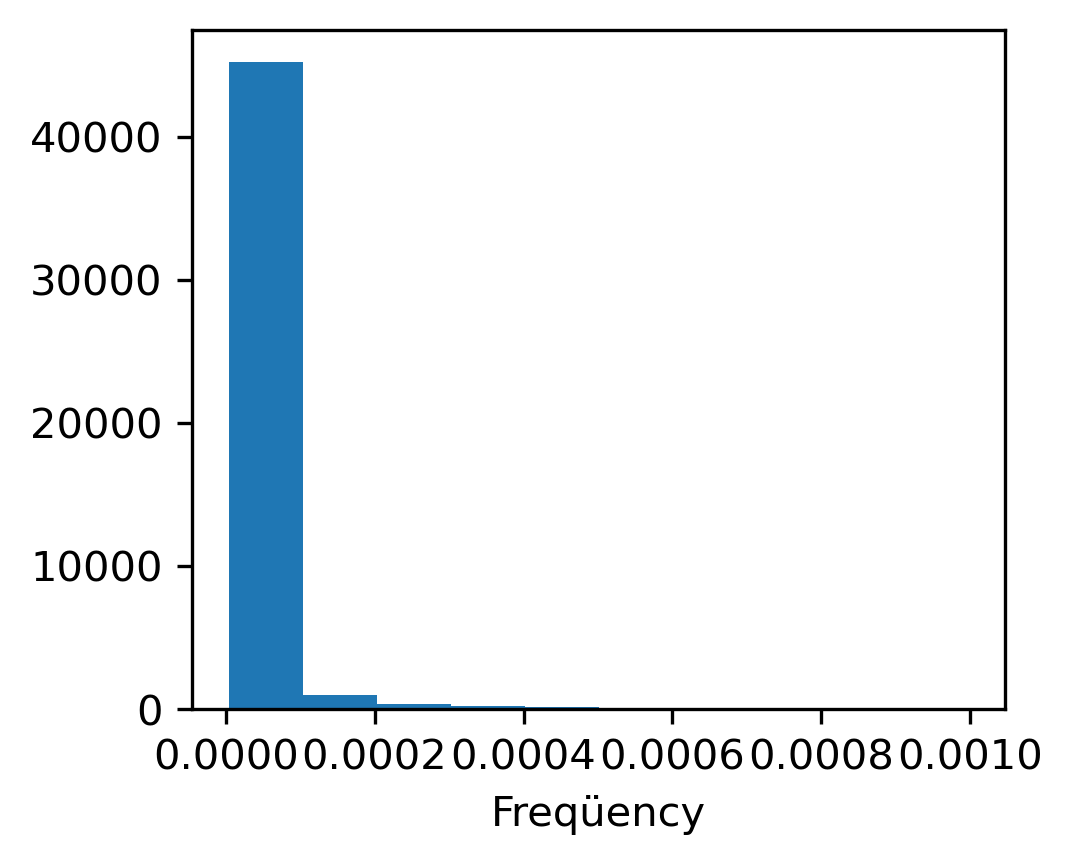

In [177]:
AFs = ch_gnomad['AF'][ch_gnomad['AF'] < 0.001]
plt.hist(AFs,10)
plt.xlabel('Freqüency')
plt.show()

In [178]:
ch_gnomad_filt = ch_gnomad[ch_gnomad['AF'] > 0.000219]
ch_gnomad_filt

,Chromosome,Position,rsID,REF,ALT,QUAL,FILTER,Gene,Transcript,AF,controls_AF,non_cancer_AF
19,1,1789069,rs151237596,G,A,161350.34,PASS,GNB1,ENST00000378609,0.000462,0.000320,0.000477
51,1,1789231,rs79516120,G,A,472139.48,PASS,GNB1,ENST00000378609,0.001035,0.000878,0.001044
84,1,1793247,rs143709588,C,T,195866.87,PASS,GNB1,ENST00000378609,0.000824,0.000680,0.000784
89,1,1793280,rs77027087,G,A,992189.83,PASS,GNB1,ENST00000378609,0.004203,0.004204,0.004117
193,1,43338136,rs17292650,G,T,2358643.09,PASS,MPL,ENST00000372470,0.003535,0.003355,0.003503
...,...,...,...,...,...,...,...,...,...,...,...,...
53941,X,124062942,rs778840109,G,A,71707.17,PASS,STAG2,ENST00000371145,0.000426,0.000437,0.000448
53959,X,124063886,rs754339302,A,G,56395.04,PASS,STAG2,ENST00000371145,0.000229,0.000299,0.000233
53985,X,124065932,rs10217943,C,T,1309786.56,PASS,STAG2,ENST00000371145,0.005789,0.005728,0.005635
54056,X,124081433,rs202140215,T,C,86656.60,PASS,STAG2,ENST00000371145,0.000302,0.000429,0.000323


In [179]:
### FILTER

CH_mutations_withgnomadannot = pd.merge(CH_mutations, ch_gnomad_filt,  how='left', left_on=['#CHROM','POS', 'REF', 'ALT'], right_on = ['Chromosome','Position', 'REF', 'ALT'])
CH_mutations_withgnomadannot

,#CHROM,POS,ID,REF,ALT,QUAL_x,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER_x,VEP,patient,Chromosome,Position,rsID,QUAL_y,FILTER_y,Gene,Transcript,AF,controls_AF,non_cancer_AF
0,1,204532210,.,A,G,0.00,2,17,0.117647,0.882353,1,SNV,missense_variant,MODERATE,MDM4,ENST00000367182,307,103,R/G,NaN,ENSP00000356150,NaN,NaN,0/0,"15,2,0",2,NaN,NaN,"0,2,477,45,483,526","11,4,1,1",BaseQRankSum=-1.345;DP=17;ExcessHet=3.0103;MLE...,G|missense_variant|MODERATE|MDM4|ENSG000001986...,.,CSQ=G|missense_variant|MODERATE|MDM4|ENSG00000...,4033478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,152235860,rs199504848,C,T,0.13,6,62,0.096774,0.903226,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.013970,0.018870,0/1,"56,6,0",13,NaN,NaN,"13,0,1714,181,1732,1913","34,22,4,2",BaseQRankSum=0.288;DB;DP=62;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,152238768,rs4024420,T,C,0.75,4,28,0.142857,0.857143,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2591,864,E/G,rs4024420,ENSP00000262189,0.041240,0.051350,0/1,"24,4,0",21,NaN,NaN,"21,0,703,93,715,808","12,12,0,4",BaseQRankSum=3.245;DB;DP=28;ExcessHet=3.0103;M...,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,152238825,rs4024419,C,T,12.99,4,20,0.200000,0.800000,1,SNV,missense_variant&splice_region_variant,MODERATE,KMT2C,ENST00000262189,2534,845,G/E,rs4024419,ENSP00000262189,0.019910,0.028420,0/1,"16,4,0",41,NaN,NaN,"41,0,505,89,517,606","5,11,0,4",BaseQRankSum=0.049;DB;DP=20;ExcessHet=3.0103;M...,CSQ=T|missense_variant&splice_region_variant|M...,.,CSQ=T|missense_variant&splice_region_variant|M...,4033478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,152247986,rs150073007,G,GT,166.73,9,44,0.204545,0.795455,1,Indel,stop_gained&frameshift_variant,HIGH,KMT2C,ENST00000262189,2447-2448,816,Y/*,rs150073007,ENSP00000262189,0.487200,0.484900,0/1,"35,9,0",99,NaN,NaN,"204,0,1155,310,1182,1491","26,9,5,4",BaseQRankSum=-0.888;DB;DP=46;ExcessHet=3.0103;...,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,.,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,4033478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140727,12,45850657,rs145274890,C,G,426.77,14,45,0.311111,0.688889,1,SNV,missense_variant,MODERATE,ARID2,ENST00000334344,2534,845,T/S,rs145274890,ENSP00000335044,0.000012,0.000026,0/1,"31,14,0",99,NaN,NaN,"455,0,1003,548,1045,1593","15,16,9,5",BaseQRankSum=1.760;DB;DP=46;ExcessHet=3.0103;M...,CSQ=G|missense_variant|MODERATE|ARID2|ENSG0000...,.,CSQ=G|missense_variant|MODERATE|ARID2|ENSG0000...,5106053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140728,12,111446804,rs3184504,T,C,210.77,13,50,0.260000,0.740000,1,SNV,missense_variant,MODERATE,SH2B3,ENST00000341259,784,262,W/R,rs3184504&CM084630,ENSP00000345492,0.667400,0.511200,0/1,"37,13,0",99,NaN,NaN,"239,0,954,350,993,1343","19,18,6,7",BaseQRankSum=-0.181;DB;DP=50;ExcessHet=3.0103;...,CSQ=C|missense_variant|MODERATE|SH2B3|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|SH2B3|ENSG0000...,5106053,12,111446804.0,rs3184504,1.476566e+08,PASS,SH2B3,ENST00000341259,0.667391,0.699269,0.673459
140729,X,44961367,.,C,A,0.13,2,12,0.166667,0.833333,1,SNV,missense_variant,MODERATE,KDM6A,ENST00000377967,309,103,N/K,NaN,ENSP00000367203,NaN,NaN,0/1,"10,2,0",13,NaN,NaN,"13,0,391,43,397,440","3,7,1,1",BaseQRankSum=-2.085;DP=12;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|KDM6A|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|KDM6A|ENSG0000...,5106053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140730,X,

In [180]:
CH_mutations_NOgnomad2 = CH_mutations_withgnomadannot[CH_mutations_withgnomadannot['Chromosome'].isnull()]
CH_mutations_NOgnomad2

,#CHROM,POS,ID,REF,ALT,QUAL_x,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER_x,VEP,patient,Chromosome,Position,rsID,QUAL_y,FILTER_y,Gene,Transcript,AF,controls_AF,non_cancer_AF
0,1,204532210,.,A,G,0.00,2,17,0.117647,0.882353,1,SNV,missense_variant,MODERATE,MDM4,ENST00000367182,307,103,R/G,NaN,ENSP00000356150,NaN,NaN,0/0,"15,2,0",2,NaN,NaN,"0,2,477,45,483,526","11,4,1,1",BaseQRankSum=-1.345;DP=17;ExcessHet=3.0103;MLE...,G|missense_variant|MODERATE|MDM4|ENSG000001986...,.,CSQ=G|missense_variant|MODERATE|MDM4|ENSG00000...,4033478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,152235860,rs199504848,C,T,0.13,6,62,0.096774,0.903226,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.013970,0.018870,0/1,"56,6,0",13,NaN,NaN,"13,0,1714,181,1732,1913","34,22,4,2",BaseQRankSum=0.288;DB;DP=62;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,152238768,rs4024420,T,C,0.75,4,28,0.142857,0.857143,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2591,864,E/G,rs4024420,ENSP00000262189,0.041240,0.051350,0/1,"24,4,0",21,NaN,NaN,"21,0,703,93,715,808","12,12,0,4",BaseQRankSum=3.245;DB;DP=28;ExcessHet=3.0103;M...,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,152238825,rs4024419,C,T,12.99,4,20,0.200000,0.800000,1,SNV,missense_variant&splice_region_variant,MODERATE,KMT2C,ENST00000262189,2534,845,G/E,rs4024419,ENSP00000262189,0.019910,0.028420,0/1,"16,4,0",41,NaN,NaN,"41,0,505,89,517,606","5,11,0,4",BaseQRankSum=0.049;DB;DP=20;ExcessHet=3.0103;M...,CSQ=T|missense_variant&splice_region_variant|M...,.,CSQ=T|missense_variant&splice_region_variant|M...,4033478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,152247986,rs150073007,G,GT,166.73,9,44,0.204545,0.795455,1,Indel,stop_gained&frameshift_variant,HIGH,KMT2C,ENST00000262189,2447-2448,816,Y/*,rs150073007,ENSP00000262189,0.487200,0.484900,0/1,"35,9,0",99,NaN,NaN,"204,0,1155,310,1182,1491","26,9,5,4",BaseQRankSum=-0.888;DB;DP=46;ExcessHet=3.0103;...,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,.,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,4033478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140726,8,100705604,rs75035099,G,C,0.05,2,16,0.125000,0.875000,1,SNV,missense_variant,MODERATE,PABPC1,ENST00000318607,1672,558,Q/E,rs75035099,ENSP00000313007,0.045100,0.052870,0/1,"14,2,0",9,NaN,NaN,"9,0,495,51,501,552","10,4,1,1",BaseQRankSum=-0.407;DB;DP=16;ExcessHet=3.0103;...,CSQ=C|missense_variant|MODERATE|PABPC1|ENSG000...,.,CSQ=C|missense_variant|MODERATE|PABPC1|ENSG000...,5106053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140727,12,45850657,rs145274890,C,G,426.77,14,45,0.311111,0.688889,1,SNV,missense_variant,MODERATE,ARID2,ENST00000334344,2534,845,T/S,rs145274890,ENSP00000335044,0.000012,0.000026,0/1,"31,14,0",99,NaN,NaN,"455,0,1003,548,1045,1593","15,16,9,5",BaseQRankSum=1.760;DB;DP=46;ExcessHet=3.0103;M...,CSQ=G|missense_variant|MODERATE|ARID2|ENSG0000...,.,CSQ=G|missense_variant|MODERATE|ARID2|ENSG0000...,5106053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140729,X,44961367,.,C,A,0.13,2,12,0.166667,0.833333,1,SNV,missense_variant,MODERATE,KDM6A,ENST00000377967,309,103,N/K,NaN,ENSP00000367203,NaN,NaN,0/1,"10,2,0",13,NaN,NaN,"13,0,391,43,397,440","3,7,1,1",BaseQRankSum=-2.085;DP=12;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|KDM6A|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|KDM6A|ENSG0000...,5106053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140730,X,45079158,.,T,C,0.25,2,11,0.181818,0.818182,1,SNV,missense_variant,MO

In [181]:
print(len(CH_mutations.groupby(['#CHROM', 'POS', 'REF', 'ALT']).size()))
print(len(CH_mutations_NOgnomad2.groupby(['#CHROM', 'POS', 'REF', 'ALT']).size()))


11006
10639


In [182]:
CH_mutations

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient
0,1,204532210,.,A,G,0.00,2,17,0.117647,0.882353,1,SNV,missense_variant,MODERATE,MDM4,ENST00000367182,307,103,R/G,NaN,ENSP00000356150,NaN,NaN,0/0,"15,2,0",2,NaN,NaN,"0,2,477,45,483,526","11,4,1,1",BaseQRankSum=-1.345;DP=17;ExcessHet=3.0103;MLE...,G|missense_variant|MODERATE|MDM4|ENSG000001986...,.,CSQ=G|missense_variant|MODERATE|MDM4|ENSG00000...,4033478
1,7,152235860,rs199504848,C,T,0.13,6,62,0.096774,0.903226,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.013970,0.018870,0/1,"56,6,0",13,NaN,NaN,"13,0,1714,181,1732,1913","34,22,4,2",BaseQRankSum=0.288;DB;DP=62;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478
2,7,152238768,rs4024420,T,C,0.75,4,28,0.142857,0.857143,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2591,864,E/G,rs4024420,ENSP00000262189,0.041240,0.051350,0/1,"24,4,0",21,NaN,NaN,"21,0,703,93,715,808","12,12,0,4",BaseQRankSum=3.245;DB;DP=28;ExcessHet=3.0103;M...,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478
3,7,152238825,rs4024419,C,T,12.99,4,20,0.200000,0.800000,1,SNV,missense_variant&splice_region_variant,MODERATE,KMT2C,ENST00000262189,2534,845,G/E,rs4024419,ENSP00000262189,0.019910,0.028420,0/1,"16,4,0",41,NaN,NaN,"41,0,505,89,517,606","5,11,0,4",BaseQRankSum=0.049;DB;DP=20;ExcessHet=3.0103;M...,CSQ=T|missense_variant&splice_region_variant|M...,.,CSQ=T|missense_variant&splice_region_variant|M...,4033478
4,7,152247986,rs150073007,G,GT,166.73,9,44,0.204545,0.795455,1,Indel,stop_gained&frameshift_variant,HIGH,KMT2C,ENST00000262189,2447-2448,816,Y/*,rs150073007,ENSP00000262189,0.487200,0.484900,0/1,"35,9,0",99,NaN,NaN,"204,0,1155,310,1182,1491","26,9,5,4",BaseQRankSum=-0.888;DB;DP=46;ExcessHet=3.0103;...,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,.,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,4033478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70166,12,45850657,rs145274890,C,G,426.77,14,45,0.311111,0.688889,1,SNV,missense_variant,MODERATE,ARID2,ENST00000334344,2534,845,T/S,rs145274890,ENSP00000335044,0.000012,0.000026,0/1,"31,14,0",99,NaN,NaN,"455,0,1003,548,1045,1593","15,16,9,5",BaseQRankSum=1.760;DB;DP=46;ExcessHet=3.0103;M...,CSQ=G|missense_variant|MODERATE|ARID2|ENSG0000...,.,CSQ=G|missense_variant|MODERATE|ARID2|ENSG0000...,5106053
70167,12,111446804,rs3184504,T,C,210.77,13,50,0.260000,0.740000,1,SNV,missense_variant,MODERATE,SH2B3,ENST00000341259,784,262,W/R,rs3184504&CM084630,ENSP00000345492,0.667400,0.511200,0/1,"37,13,0",99,NaN,NaN,"239,0,954,350,993,1343","19,18,6,7",BaseQRankSum=-0.181;DB;DP=50;ExcessHet=3.0103;...,CSQ=C|missense_variant|MODERATE|SH2B3|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|SH2B3|ENSG0000...,5106053
70168,X,44961367,.,C,A,0.13,2,12,0.166667,0.833333,1,SNV,missense_variant,MODERATE,KDM6A,ENST00000377967,309,103,N/K,NaN,ENSP00000367203,NaN,NaN,0/1,"10,2,0",13,NaN,NaN,"13,0,391,43,397,440","3,7,1,1",BaseQRankSum=-2.085;DP=12;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|KDM6A|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|KDM6A|ENSG0000...,5106053
70169,X,45079158,.,T,C,0.25,2,11,0.181818,0.818182,1,SNV,missense_variant,MODERATE,KDM6A,ENST00000377967,2951,984,F/S,COSV65043243,ENSP00000367203,NaN,NaN,0/1,"9,2,0",16,NaN,NaN,"16,0,290,43,296,339","8,1,1,1",BaseQRankSum=-1.602;DP=11;ExcessHet=3.0103;MLE...,CSQ=C|missense_variant|MODERATE|KDM6A|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KDM6A|ENSG0000...,5106053


In [183]:
CH_mutations_NOgnomad2['Position'].isnull().value_counts()

True    121900
Name: Position, dtype: int64

In [184]:
CH_mutations[CH_mutations['Consequence'] == 'frameshift_variant']

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient
15,12,49030384,.,GGGGGT,G,0.00,2,38,0.052632,0.947368,1,Indel,frameshift_variant,HIGH,KMT2D,ENST00000301067,13890-13894,4630-4632,PPP/PX,NaN,ENSP00000301067,NaN,NaN,0/0,"36,2,0",24,NaN,NaN,"0,24,1469,108,1475,1560","12,24,1,1",BaseQRankSum=-1.312;DP=46;ExcessHet=3.0103;MLE...,CSQ=-|frameshift_variant|HIGH|KMT2D|ENSG000001...,.,CSQ=-|frameshift_variant|HIGH|KMT2D|ENSG000001...,4034157
19,1,179109043,rs778771004,CAGCAGTGCCACTG,C,19.78,6,65,0.092308,0.907692,1,Indel,frameshift_variant,HIGH,ABL2,ENST00000502732,2211-2223,737-741,GSGTA/X,rs778771004,ENSP00000427562,0.000224,0.000111,0/1,"59,6,0",57,0|1,179109034_A_C,"57,0,8608,238,8626,8864","16,43,6,0",BaseQRankSum=0.771;DB;DP=65;ExcessHet=3.0103;M...,-|frameshift_variant|HIGH|ABL2|ENSG00000143322...,.,CSQ=-|intron_variant|MODIFIER|ABL2|ENSG0000014...,4230114
48,1,179109043,rs778771004,CAGCAGTGCCACTG,C,0.00,4,37,0.108108,0.891892,1,Indel,frameshift_variant,HIGH,ABL2,ENST00000502732,2211-2223,737-741,GSGTA/X,rs778771004,ENSP00000427562,0.000224,0.000111,0/0,"33,4,0",22,0|1,179109038_A_C,"0,22,4494,99,4505,4583","6,27,4,0",BaseQRankSum=-0.617;DB;DP=39;ExcessHet=3.0103;...,-|frameshift_variant|HIGH|ABL2|ENSG00000143322...,.,CSQ=-|intron_variant|MODIFIER|ABL2|ENSG0000014...,4436663
65,1,179109043,rs778771004,CAGCAGTGCCACTG,C,0.00,4,63,0.063492,0.936508,1,Indel,frameshift_variant,HIGH,ABL2,ENST00000502732,2211-2223,737-741,GSGTA/X,rs778771004,ENSP00000427562,0.000224,0.000111,0/0,"59,4,0",25,0|1,179109038_A_C,"0,25,5022,177,5037,5189","8,51,4,0",BaseQRankSum=1.392;DB;DP=63;ExcessHet=3.0103;M...,-|frameshift_variant|HIGH|ABL2|ENSG00000143322...,.,CSQ=-|intron_variant|MODIFIER|ABL2|ENSG0000014...,4149077
66,2,197400833,.,AT,A,0.00,2,24,0.083333,0.916667,1,Indel,frameshift_variant,HIGH,SF3B1,ENST00000335508,2599,867,M/X,NaN,ENSP00000335321,NaN,NaN,0/0,"22,2,0",7,NaN,NaN,"0,7,652,66,658,717","12,10,1,1",BaseQRankSum=-1.853;DP=25;ExcessHet=3.0103;MLE...,CSQ=-|frameshift_variant|HIGH|SF3B1|ENSG000001...,.,CSQ=-|frameshift_variant|HIGH|SF3B1|ENSG000001...,4149077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70039,1,179109043,rs778771004,CAGCAGTGCCACTG,C,12.01,7,49,0.142857,0.857143,1,Indel,frameshift_variant,HIGH,ABL2,ENST00000502732,2211-2223,737-741,GSGTA/X,rs778771004,ENSP00000427562,0.000224,0.000111,0/1,"42,7,0",49,0|1,179109038_A_C,"49,0,4446,175,4469,4644","7,35,7,0",BaseQRankSum=1.328;DB;DP=49;ExcessHet=3.0103;M...,-|frameshift_variant|HIGH|ABL2|ENSG00000143322...,.,CSQ=-|intron_variant|MODIFIER|ABL2|ENSG0000014...,5221630
70056,1,179109043,rs778771004,CAGCAGTGCCACTG,C,34.73,5,40,0.125000,0.875000,1,Indel,frameshift_variant,HIGH,ABL2,ENST00000502732,2211-2223,737-741,GSGTA/X,rs778771004,ENSP00000427562,0.000224,0.000111,0/1,"35,5,0",72,0|1,179109038_A_C,"72,0,4946,177,4961,5138","7,28,5,0",BaseQRankSum=-0.417;DB;DP=41;ExcessHet=3.0103;...,-|frameshift_variant|HIGH|ABL2|ENSG00000143322...,.,CSQ=-|intron_variant|MODIFIER|ABL2|ENSG0000014...,5066217
70070,1,179109043,rs778771004,CAGCAGTGCCACTG,C,0.00,2,33,0.060606,0.939394,1,Indel,frameshift_variant,HIGH,ABL2,ENST00000502732,2211-2223,737-741,GSGTA/X,rs778771004,ENSP00000427562,0.000224,0.000111,0/0,"31,2,0",31,0|1,179109038_A_C,"0,31,4821,99,4828,4896","4,27,2,0",BaseQRankSum=-1.153;DB;DP=33;ExcessHet=3.0103;...,-|frameshift_variant|HIGH|ABL2|ENSG00000143322...,.,CSQ=-|intron_variant|MODIFIER|ABL2|ENSG0000014...,5107908
70073,7,152177062,rs771193709,C,CT,3.96,4,25,0.160000,0.840000,1,Indel,frameshift_variant,HIGH,KMT2C,ENST00000262189,8390-8391,2797,K/KX,rs747256476&COSV51431331,ENSP00000262189,0.000040,0.000054,0/1,"21,4,0",39,NaN,NaN,"39,0,501,102,513,616","7,14,1,3",BaseQRankSum=-1.621;DB;DP=29;ExcessHet=3.0103;...,CSQ=T